# Upgrad Lending Club Case Study

By
* Varadhan Mariappan
* Vijayamma Battala

1. Data Understanding
2. Data Cleaning
3. Univariate Analysis
4. Segmented Univariate Analysis
5. Bivariate Analysis
6. Correlation Analysis
7. Recommendations

# 1. Data Understading
### 1.1. Problem Statement
A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

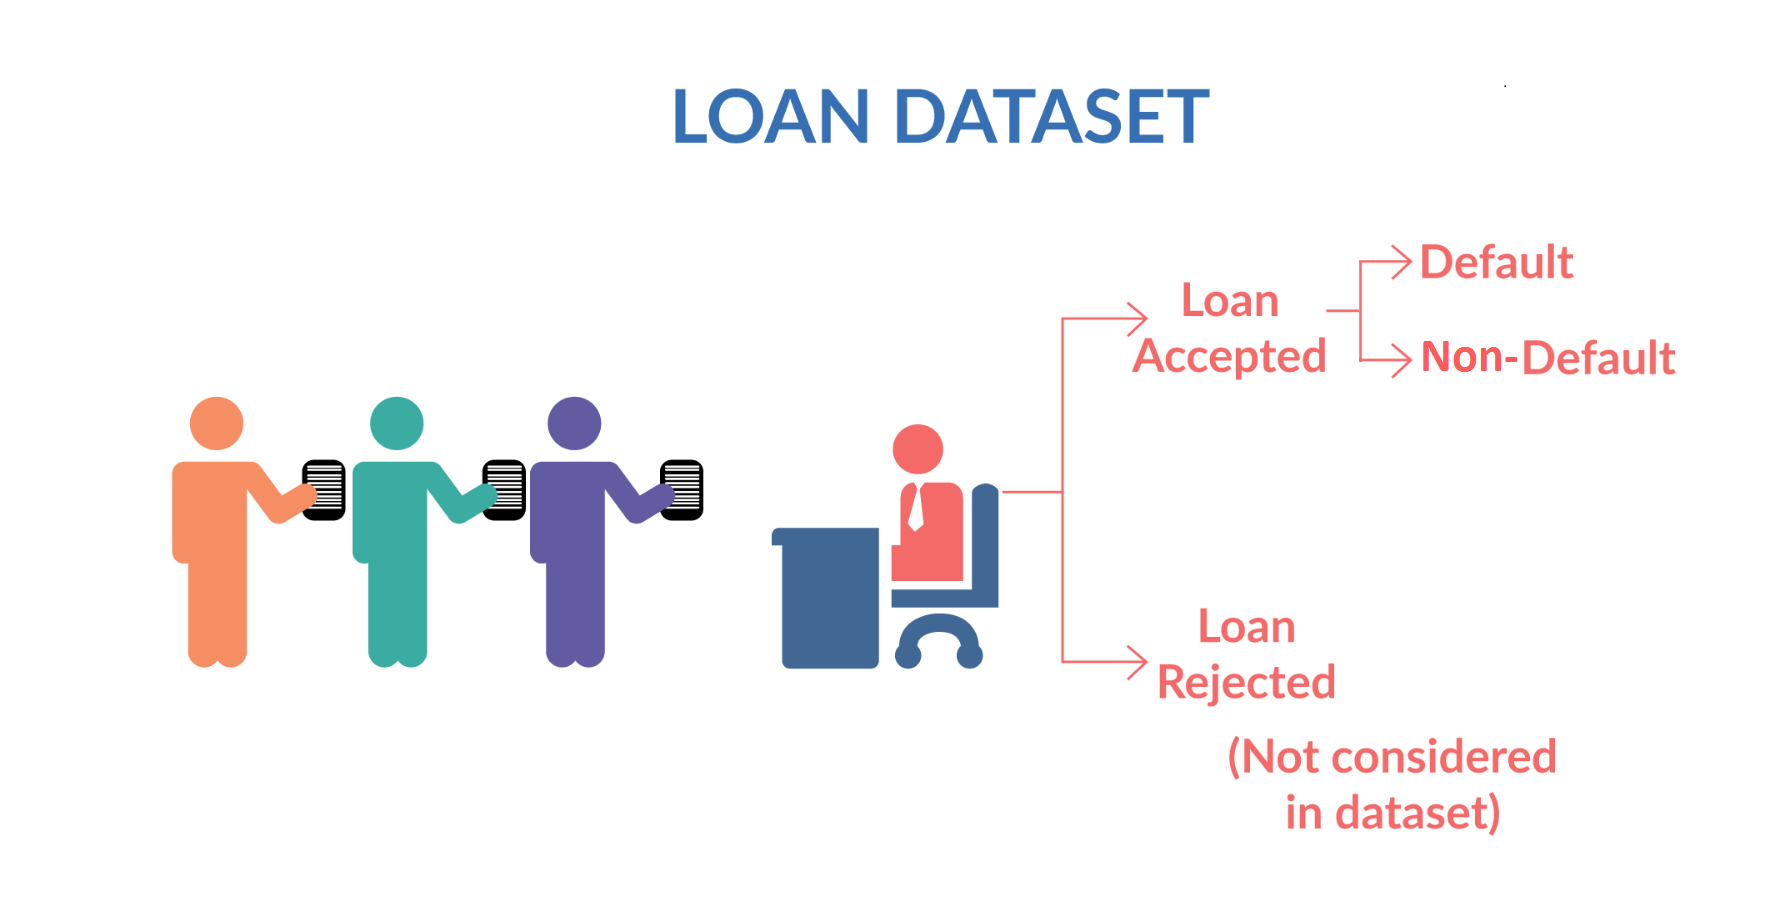)

### 1.2. Business Objectives
* Identification of such applicants using EDA is the aim of this case study.
* Identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.
* The company wants to understand the driving factors (or driver variables) behind loan default. The company can utilise this knowledge for its portfolio and risk assessment.
  

### 1.3 Understanding datasets

#### 1.3.1 Finance attributes
- **loan_amnt** - Amount of money applied for the loan
- **verification_status** - Lender have verified the customer demographics for loan sancation
- **int_rate** - Loan interest rate charged by bank for the customer
- **installment** - Number of monthly installment to repay the loan
- **pub_rec** - Number of derogatory public records which can potentially lead to defaulting the loan.
- **pub_rec_bankruptcies** - Number of locally available bankruptcy record for the customer, indicates the loan to be defaulted.
- **grade** - Rating provided based on credit score indicating the risk
- **purpose** - Purpose of loan categorically differentiated
- **issue_d** - The month which the loan was funded
- **loan_status**
    * **Fully Paid** - Customer have fully paid the loan amount
    * **Current** - Customer who are currently paying the loan amount (non-default)
    * **Charged-off** - Customer who have not paid the loan amount and defaulted
es


#### 1.3.2 Borrower attributes
- **annual_inc** - Customer annual income, higher annual income leads to approval for higher loan amount
- **addr_state** - Customer address state can potentionally impact loan approval since it may be related to econoimic growth of the state.
- **emp_length** - Years of experience can lead to higher income, which can lead to higher loan amount approval.
- **home_ownership** - Cusomter owns home or morgaged or rents, can be used for loan approval and to indetify loan risk
- **dti** - Debt-to-income ration ncan be used to understand if customer can pay their debts and pay the loan amount which has been applied. Lower this value the high rate of loan approval success.

### 2. Data Cleaning

In [10]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
df_org = pd.read_csv("./loan/loan.csv")
df_clean = df_org.copy()

#### 2.1.1. Check for header & footer
#### 2.1.2. If there is any empty rows

In [13]:
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
df_clean[df_clean.isnull().all(axis=1)].shape

(0, 111)

#### 2.1.3. Check for null values and compare with total rows, to indetify all columns are null values, then need to drop the columns which is not useful

In [16]:
df_clean.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [17]:
df_clean.shape

(39717, 111)

In [18]:
#found many columns have null only values
df_clean = df_clean.dropna(axis=1, how='all')
df_clean.shape

(39717, 57)

#### 2.1.4. Remove columns having more than 60% of values missing

In [20]:
missing_percentage = (df_clean.isna().sum()/df_clean.shape[0]*100).sort_values(ascending=False)

In [21]:
threshold = 60 #remove the columns missing values more than 60%
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df_clean = df_clean.drop(columns=columns_to_drop)

In [22]:
#dropped column having missing values more than 60%
df_clean.shape
#3 columns have been removed

(39717, 54)

In [23]:
df_clean.isna().sum().sort_values(ascending=False).head()

desc                    12942
emp_title                2459
emp_length               1075
pub_rec_bankruptcies      697
last_pymnt_d               71
dtype: int64

#### 2.1.5. Remove descriptive columns

In [25]:
columns_to_drop = [ "desc", "emp_title" ]
df_clean.drop(columns=columns_to_drop, inplace=True)

In [26]:
df_clean.isna().sum().sort_values(ascending=False).head()

emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
dtype: int64

#### 2.1.6 Remove Unwanted rows

In [28]:
#### 2.1.6.1 Remove Duplicate rows

In [29]:
df_clean[df_clean.duplicated()]
#No records found to be duplicated

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


#### 2.1.6.1 Remove Unwanted rows

In [31]:
df_clean[(df_clean["loan_status"] == "Current") & (df_clean["chargeoff_within_12_mths"] != 0.0)]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [32]:
#since no current status account considerede to be defaulted or chargeoff_within_12_mths is always 0 
#this will not be useful for problem statement, deleting the rows having loan_status current
df_clean = df_clean[(df_clean["loan_status"] != "Current")]

In [33]:
df_clean.shape

(38577, 52)

#### 2.1.7 Understand and remove unwanted columns which are not useful for analysis

In [35]:
df_clean.columns
#filtering based on objects those columns are required or not
#required: term, int_rate, grade, sub_grade, emp_length, home_ownership, emp_length,  
# verification_status, issue_d, loan_status, purpose, addr_state, revol_util(can be converted),
# last_pymnt_d(converted to date), last_credit_pull_d(convert to date)
#not required: emp_title, pymnt_plan, url, title, zip_code, member_id, id

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [36]:
cols_to_drop = [ "earliest_cr_line", "pymnt_plan", 
                "url", "title", "zip_code", 
                "member_id", "id" ]
df_clean.drop(cols_to_drop, axis = 1, inplace = True)

#### Remove the columns which don't have unique values not more than 1 values

In [38]:
#removing columns which dont have unique values more than 1
drop_cols = []
for col in df_clean.columns:
    uniq_len = len(df_clean[~df_clean[col].isna()][col].unique())
    if uniq_len == 1:
        drop_cols.append(col)

#removing columns which dont have unique values more than 1
df_clean.drop(drop_cols,axis=1,inplace=True)

#### 2.1.7. Verify Non-numerical values and standardize it

In [40]:
df_object_cols = df_clean.select_dtypes(include=['object'])
df_object_cols.nunique().sort_values(ascending=False).head()

revol_util            1088
int_rate               370
last_credit_pull_d     106
last_pymnt_d           101
issue_d                 55
dtype: int64

#### 2.1.7.1 Convert the date columns to proper datetime format

In [42]:
df_clean[["last_credit_pull_d", "last_pymnt_d", "issue_d"]]
for col in ["last_credit_pull_d", "last_pymnt_d", "issue_d"]:
    df_clean[col] = pd.to_datetime(df_clean[col], format='%b-%y')

#### 2.1.7.2 Remove the '%' from columns having symbols

In [44]:
#fix the int_rate, revol_util non-standard unit to float\
df_clean.int_rate = df_clean.int_rate.apply(lambda x: x[:-1] if not pd.isna(x) else '0.0').astype(float)
df_clean.revol_util = df_clean.revol_util.apply(lambda x: x[:-1] if not pd.isna(x) else '0.0').astype(float)

#### 2.1.7.2 Fix the decimal points round to 2 decimal points

In [46]:
#rounding the values to 2 decimal
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'annual_inc']:
    df_clean[col] = df_clean[col].apply(lambda x: round(x, 2))

#### 2.1.7.3 Remove strings from numeric variables

In [48]:
#remove months from term
df_clean.term = df_clean.term.str.replace("months","").astype(int)

#### 2.1.7.4 Replace strings which are says NaN, NULL or NONE etc,.

In [50]:
df_clean.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [51]:
df_clean.home_ownership.replace('NONE', 'OTHER', inplace = True)

#### 2.1.7.4 Merge values if they are not having different meaning

In [53]:
df_clean.verification_status.value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [54]:
#We will consider source verified also as verified
df_clean.verification_status.replace('Source Verified', 'Verified', inplace = True)

#### 2.1.7.5 Replace Null values with relative values

In [56]:
# print the columns having null values
df_clean.isna().sum().sort_values(ascending=False).head()

emp_length              1033
pub_rec_bankruptcies     697
last_pymnt_d              71
last_credit_pull_d         2
total_pymnt_inv            0
dtype: int64

In [57]:
#To fix the emp_length, we will use annual_inc variable based on the annual_inc we will apply the emp_length
#Lets fix the annual_inc if there are any outliers and calculate the emp_length based on annual_inc
df_clean.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

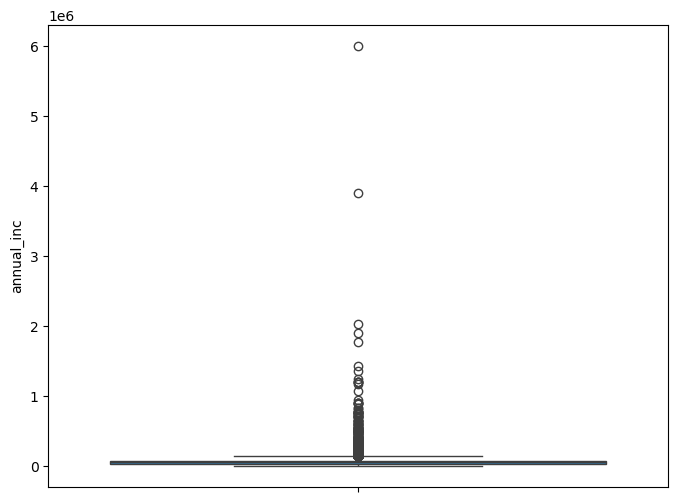

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean['annual_inc'])
plt.show()

In [59]:
#remove the outliers in annual_inc
Q1 = df_clean['annual_inc'].quantile(0.25)
Q3 = df_clean['annual_inc'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['annual_inc'] >= lower_bound) & (df_clean['annual_inc'] <= upper_bound)]

<Axes: ylabel='annual_inc'>

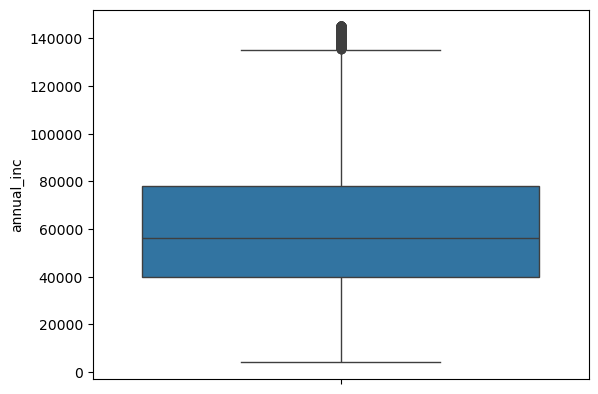

In [60]:
sns.boxplot(y=df_clean['annual_inc'])
#still found outliers

In [61]:
df_clean.shape

(36815, 35)

In [62]:
df_clean[df_clean.annual_inc<=np.percentile(df_clean.annual_inc,98)].shape

(36155, 35)

In [63]:
## Removing outliers in annual_inc greater than 98th percentile
df_clean = df_clean[df_clean.annual_inc<=np.percentile(df_clean.annual_inc,98)]

<Axes: ylabel='annual_inc'>

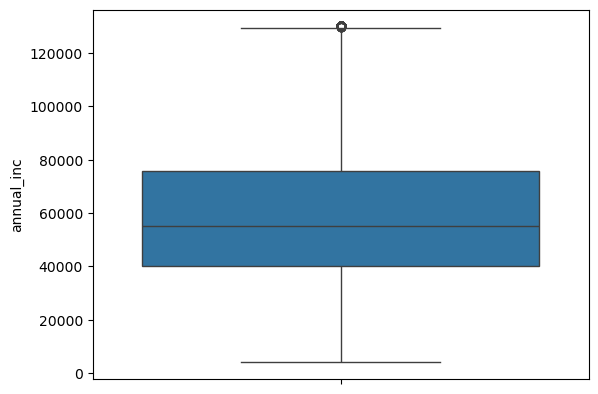

In [64]:
sns.boxplot(y=df_clean['annual_inc'])
#removed the outliers

In [65]:
#find the emp_length_annual_inc category which can be used to update the emp_length
#so based on salary will update the emp_length
emp_length_annual_inc_category = df_clean.groupby(["emp_length"])["annual_inc"].mean().sort_values()
emp_length_annual_inc_category

emp_length
< 1 year     53584.669187
2 years      55118.185302
1 year       55376.964449
3 years      57975.885156
4 years      59357.973667
5 years      59956.029535
6 years      60740.216179
7 years      61873.774006
8 years      63405.564675
9 years      65000.542353
10+ years    68718.173763
Name: annual_inc, dtype: float64

In [66]:
df_clean['emp_length'].isna().sum()

1012

In [67]:
#emp_length_annual_inc_category

# Function to find the index of the first match
def find_first_match(salary, category_series):
    return next((index for index, value in category_series.items() if value > salary), category_series.index[-1])

# find_first_match(84855.0, emp_length_annual_inc_category)

#Update the emp_length records which are null with relative emp_length based on annual_inc
df_clean.loc[df_clean[
    'emp_length'].isna(), 'emp_length'] = df_clean[df_clean['emp_length'].isna()]['annual_inc'].apply(
    lambda salary: find_first_match(salary, emp_length_annual_inc_category)
)

In [68]:
df_clean['emp_length'].isna().sum()
#ensure the null values are fixed

0

In [69]:
#Lets try to fix the next column with null values
df_clean.isna().sum().sort_values(ascending=False).head()

pub_rec_bankruptcies    653
last_pymnt_d             70
last_credit_pull_d        2
total_pymnt_inv           0
pub_rec                   0
dtype: int64

In [70]:
df_clean.shape

(36155, 35)

In [71]:
#pub_rec_bankruptcies remove the pub_rec_bankruptcies which has null
df_clean.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [72]:
df_clean.shape

(35502, 35)

In [73]:
#checking again the null value list
df_clean.isna().sum().sort_values(ascending=False).head()

last_pymnt_d          70
last_credit_pull_d     1
loan_amnt              0
total_pymnt_inv        0
pub_rec                0
dtype: int64

In [74]:
#Fix the remaining values appropriately 

#revol_util filled with 0 assuming nothing utilized 
df_clean.revol_util.fillna(0.0, inplace=True)

#fill NaN on last_pymnt_d and last_credit_pull_d with max date on column last_pymnt_d
df_clean.last_pymnt_d.fillna(df_clean.last_pymnt_d.max(), inplace=True)
df_clean.last_credit_pull_d.fillna(df_clean.last_credit_pull_d.max(), inplace=True)

In [75]:
#checking again the null value list
#no more null values found in any colums
df_clean.isna().sum().sort_values(ascending=False).head()

loan_amnt          0
total_rec_prncp    0
pub_rec            0
revol_bal          0
revol_util         0
dtype: int64

##### Standardize the data and create derived variables for future analysis

In [77]:
df_derived = df_clean.copy()

df_clean.head()
#Verify the data has been formated properly

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


#### 2.2 Create derived variables

#### 2.2.1 Add derived value and create drived values categories 

In [80]:
# convert the emp_length columnd to emp_exp for experience based metrics analysis
emp_length_dict: dict = { '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10
}
df_derived['emp_exp'] = df_derived['emp_length'].map(emp_length_dict)

In [81]:
#Updated with new column
df_derived[["emp_exp", "emp_length"]].head()

,emp_exp,emp_length
0,10,10+ years
1,0,< 1 year
2,10,10+ years
3,10,10+ years
5,3,3 years


In [82]:
#Investigate the columns for creating derived variables
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'annual_inc']:
    print(col)
    print(df_derived[col].describe())

loan_amnt
count    35502.000000
mean     10618.053208
std       7006.432135
min        500.000000
25%       5000.000000
50%       9000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
funded_amnt
count    35502.000000
mean     10372.298744
std       6755.786493
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14100.000000
max      35000.000000
Name: funded_amnt, dtype: float64
funded_amnt_inv
count    35502.000000
mean      9956.430369
std       6653.063135
min          0.000000
25%       5000.000000
50%       8450.000000
75%      13654.790000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
int_rate
count    35502.000000
mean        11.900854
std          3.679860
min          5.420000
25%          8.900000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64
dti
count    35502.000000
mean        13.512246
std          6.659020
min          0.000000
25%          8.420000


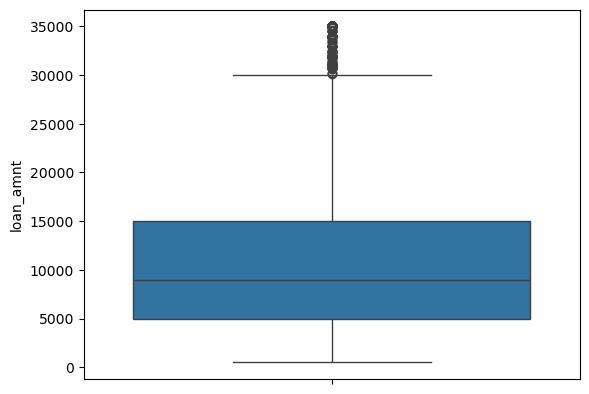

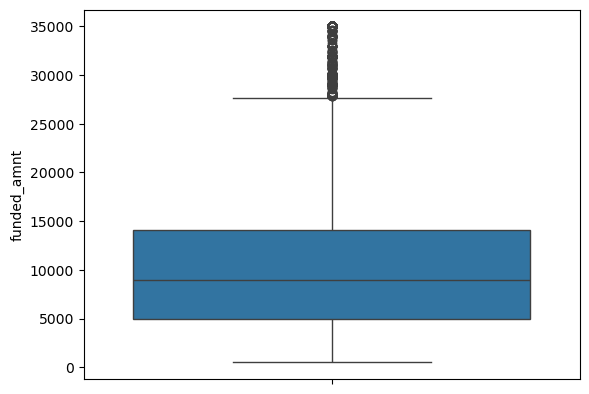

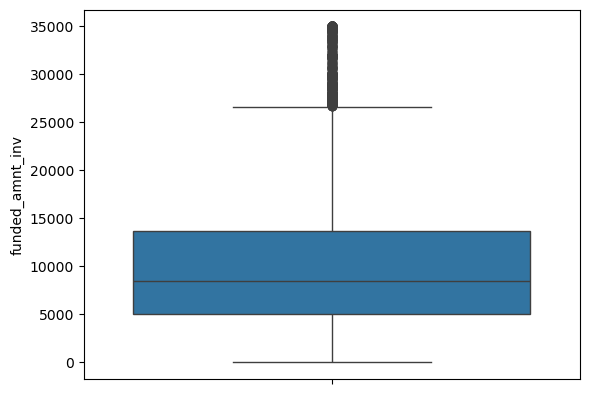

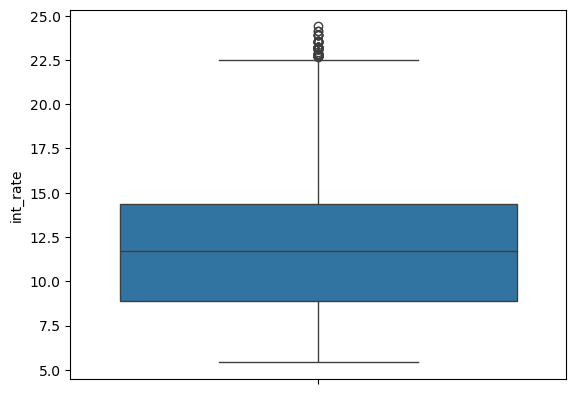

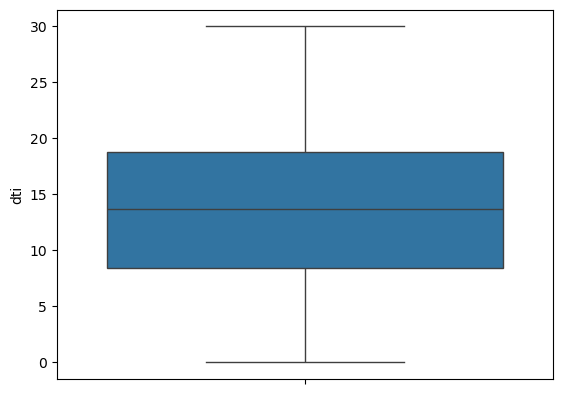

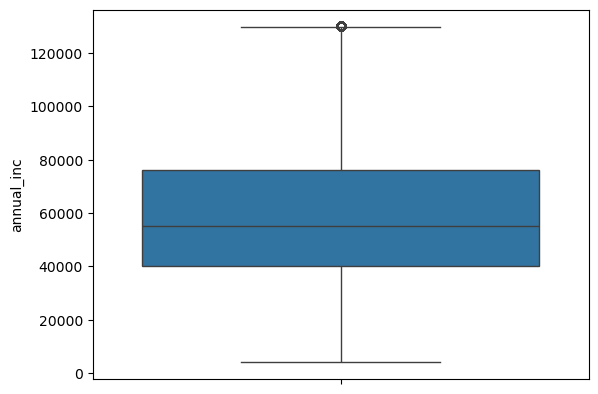

In [83]:
#Check for outliers on those fields
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'annual_inc']:
    sns.boxplot(y=df_derived[col])
    plt.show()

In [84]:
#dti there is no outliers
#annual_inc had outliers which has been fixed previously

In [85]:
df_derived.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_exp
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,10
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,10
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,10
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,3


#### 2.2.2 Add month, year and quarter based for the datetime fields

In [87]:
#derived columns
#month, year, quater
for dt_col in ['last_pymnt_d', 'last_credit_pull_d', 'issue_d']:
    df_derived[dt_col+"_m"] = df_derived[dt_col].dt.month
    df_derived[dt_col+"_y"] = df_derived[dt_col].dt.year
    df_derived[dt_col+"_q"] = np.ceil(df_derived[dt_col].dt.month/3).astype(int)

In [88]:
df_derived.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,emp_exp,last_pymnt_d_m,last_pymnt_d_y,last_pymnt_d_q,last_credit_pull_d_m,last_credit_pull_d_y,last_credit_pull_d_q,issue_d_m,issue_d_y,issue_d_q
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,10,1,2015,1,5,2016,2,12,2011,4
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,0,4,2013,2,9,2013,3,12,2011,4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,10,6,2014,2,5,2016,2,12,2011,4
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,10,1,2015,1,4,2016,2,12,2011,4
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,3,1,2015,1,1,2016,1,12,2011,4


#### 2.2.3 Numerical based derived category

##### 2.2.3.1 Loan Amount Category

In [91]:
#loan_amount category
df_derived.loan_amnt.describe()

# Define the loan category dictionary with range tuples
loan_category = {
    (0, 1000): "< 1000",
    (1000, 5000): "1000 - 5000",
    (5000, 10000): "5000 - 10000",
    (10000, 20000): "10000 - 20000",
    (20000, 30000): "20000 - 30000",
    (30000, float('inf')): "30000+"
}

# Define a function to categorize loan amounts
def categorize_loan(amount):
    for range_tuple, category in loan_category.items():
        if range_tuple[0] <= amount < range_tuple[1]:
            return category
    return "< 1000"  # Return None if no category is found

# Apply the function to create the new column 'loan_category'
df_derived['loan_amnt_category'] = df_derived['loan_amnt'].apply(categorize_loan)

In [92]:
#verify the values and category
df_derived[["loan_amnt", "loan_amnt_category"]].head()

,loan_amnt,loan_amnt_category
0,5000,5000 - 10000
1,2500,1000 - 5000
2,2400,1000 - 5000
3,10000,10000 - 20000
5,5000,5000 - 10000


##### 2.2.3.2 Annual Income Category

In [94]:
#annual_inc category
df_derived.annual_inc.describe()

# Define the loan category dictionary with range tuples
annual_inc_category = {
    (0, 20000): "< 20000",
    (20000, 40000): "20000 - 40000",
    (40000, 60000): "40000 - 60000",
    (60000, 80000): "60000 - 80000",
    (80000, 100000): "80000 - 100000",
    (100000, float('inf')): "100000+"
}

# Define a function to categorize annual inc
def categorize_annual_inc(amount):
    for range_tuple, category in annual_inc_category.items():
        if range_tuple[0] <= amount < range_tuple[1]:
            return category
    return "< 1000"  # Return None if no category is found

# Apply the function to create the new column 'annual_inc_category'
df_derived['annual_inc_category'] = df_derived['annual_inc'].apply(categorize_annual_inc)

In [95]:
#verify the values and category
df_derived[["annual_inc", "annual_inc_category"]].head()

,annual_inc,annual_inc_category
0,24000.0,20000 - 40000
1,30000.0,20000 - 40000
2,12252.0,< 20000
3,49200.0,40000 - 60000
5,36000.0,20000 - 40000


##### 2.2.3.3 Interest Rate Category

In [97]:
#intr_rate category
df_derived.int_rate.describe()

count    35502.000000
mean        11.900854
std          3.679860
min          5.420000
25%          8.900000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

In [98]:
#since the category ranges from 5 to 25, will round it and store as numerical value
#so that it can be easily fetched for analysis

df_derived['int_rate_category'] = df_derived.int_rate.apply(lambda x: round(x,0))

In [99]:
df_derived[["int_rate", "int_rate_category"]].head()

,int_rate,int_rate_category
0,10.65,11.0
1,15.27,15.0
2,15.96,16.0
3,13.49,13.0
5,7.90,8.0


##### 2.2.3.4 Exployment Experience Category

In [101]:
#emp_exp category

df_derived[["emp_exp", "emp_length"]].head()
#already created

,emp_exp,emp_length
0,10,10+ years
1,0,< 1 year
2,10,10+ years
3,10,10+ years
5,3,3 years


##### 2.2.3.5 Term Year Category

In [103]:
#term year category
df_derived['term_y'] = df_derived.term.apply(lambda x: round(x/12,0)).astype(int)
df_derived[["term", "term_y"]].head()

,term,term_y
0,36,3
1,60,5
2,36,3
3,36,3
5,36,3


##### 2.2.3.6 DTI Category (Debt-to-Income) 

In [105]:
#dti rank category
# 30 is maximum value, we have 5 category 30/5 = 6 [6, 12, 18, 24, 30]

dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
dti_stage = round(df_derived.dti.max()/len(dti_labels),0)

# dti_stage
df_derived['dti_category'] = df_derived.dti.apply(lambda dti: dti_labels[int(dti/dti_stage)])

In [106]:
df_derived[["dti", "dti_category"]].head()

,dti,dti_category
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,High
5,11.20,Low


##### 2.2.3.6 Funded Amount Category

In [108]:
# funded_amnt_category
df_derived.funded_amnt.describe()

count    35502.000000
mean     10372.298744
std       6755.786493
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14100.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [109]:
# Apply the function to create the new column 'loan_category'
df_derived['funded_amnt_category'] = df_derived['funded_amnt'].apply(categorize_loan)

In [110]:
df_derived[["funded_amnt", "funded_amnt_category"]].head()

,funded_amnt,funded_amnt_category
0,5000,5000 - 10000
1,2500,1000 - 5000
2,2400,1000 - 5000
3,10000,10000 - 20000
5,5000,5000 - 10000


##### 2.2.3.7 Funded Amount Inv Category

In [112]:
df_derived.funded_amnt_inv.describe()

count    35502.000000
mean      9956.430369
std       6653.063135
min          0.000000
25%       5000.000000
50%       8450.000000
75%      13654.790000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [113]:

# Apply the function to create the new column 'loan_category'
df_derived['funded_amnt_inv_category'] = df_derived['funded_amnt_inv'].apply(categorize_loan)

In [114]:
df_derived[["funded_amnt_inv", "funded_amnt_inv_category"]].head()

,funded_amnt_inv,funded_amnt_inv_category
0,4975.0,1000 - 5000
1,2500.0,1000 - 5000
2,2400.0,1000 - 5000
3,10000.0,10000 - 20000
5,5000.0,5000 - 10000


#### 3. Univariate Analysis

In [116]:
#Univariate Analysis
df_uni = df_derived.copy()

#### 3.1. Univariate Ordered

Text(0.5, 0, 'Loan Amount')

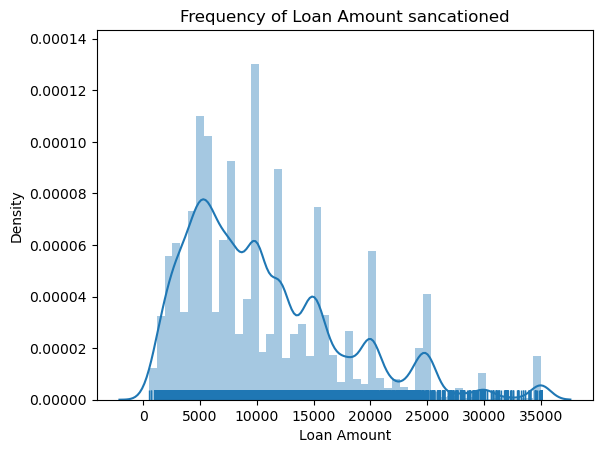

In [118]:
#Univariate Analysis Ordered 
sns.distplot(a=df_uni.loan_amnt, rug=True)

# Set the title and labels
plt.title('Frequency of Loan Amount sancationed')
plt.xlabel('Loan Amount')

# maximum of loan_amnt applied between 4000 and 10000

Text(0.5, 0, 'Funded Amount Investor')

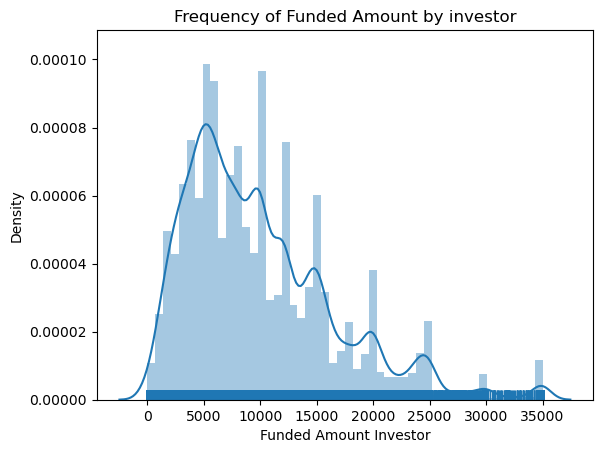

In [119]:
#Univariate Analysis Ordered 

sns.distplot(a=df_uni.funded_amnt_inv, rug=True)

# Set the title and labels
plt.title('Frequency of Funded Amount by investor')
plt.xlabel('Funded Amount Investor')

# maximum of funded_amnt_inv between 4000 and 10000
# no major deviation from loan_amnt 

Text(0.5, 0, 'Funded Amount')

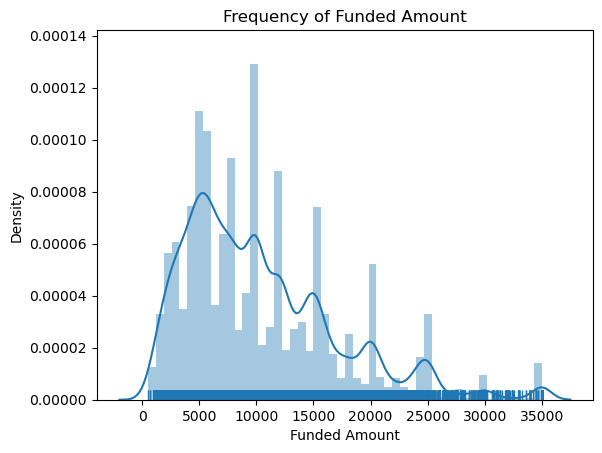

In [120]:
#Univariate Analysis Ordered 

sns.distplot(a=df_uni.funded_amnt, rug=True)

# Set the title and labels
plt.title('Frequency of Funded Amount')
plt.xlabel('Funded Amount')

# maximum of funded_amnt applied for about 4000 and 10000
# most common loan amount is 10000
# no major deviation from loan_amnt 

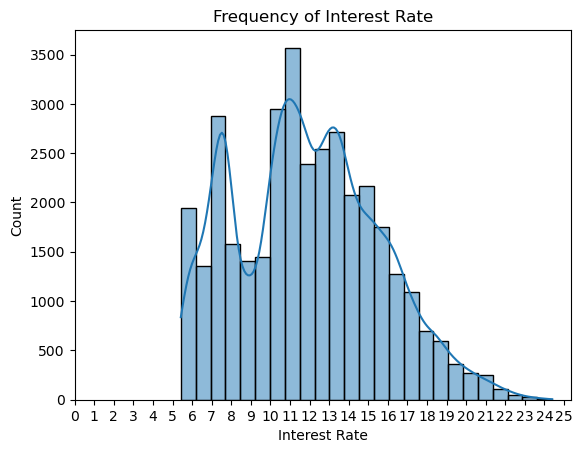

In [121]:
#Univariate Analysis Ordered 
sns.histplot(data=df_uni, x='int_rate', kde=True, bins=25)

# Set the title and labels
plt.title('Frequency of Interest Rate')
plt.xlabel('Interest Rate')

plt.xticks(range(0,26))
plt.show()
#more applicant got 11, followed by 10, 7 interest rate

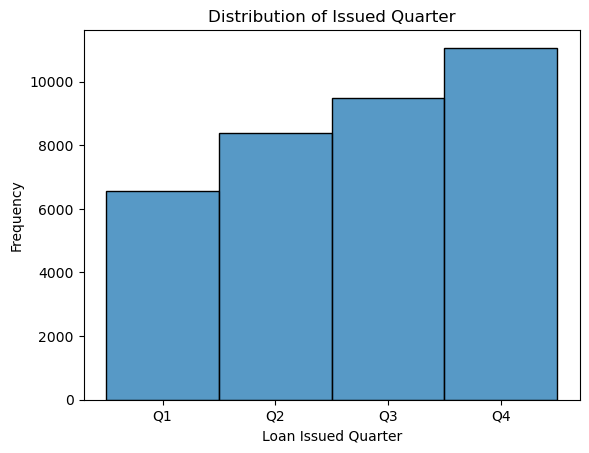

In [122]:
#Univariate Analysis Ordered 

labels = ['Q1', 'Q2', 'Q3', 'Q4']

sns.histplot(df_uni.issue_d_q, bins=4, kde=False, discrete=True)
# Set the title and labels
plt.title('Distribution of Issued Quarter')
plt.xlabel('Loan Issued Quarter')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.show()

#most of the loan got issued on Q4 

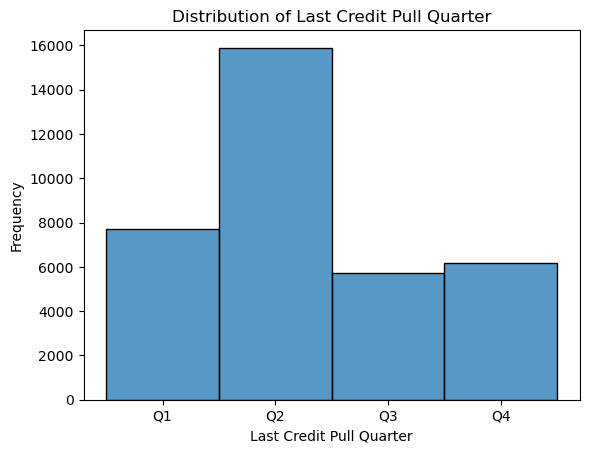

In [123]:
#Univariate Analysis Ordered 

labels = ['Q1', 'Q2', 'Q3', 'Q4']

sns.histplot(df_uni.last_credit_pull_d_q, bins=4, kde=False, discrete=True)
# Set the title and labels
plt.title('Distribution of Last Credit Pull Quarter')
plt.xlabel('Last Credit Pull Quarter')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.show()

#Q2 has lot of credit pull happening to check the borrowers

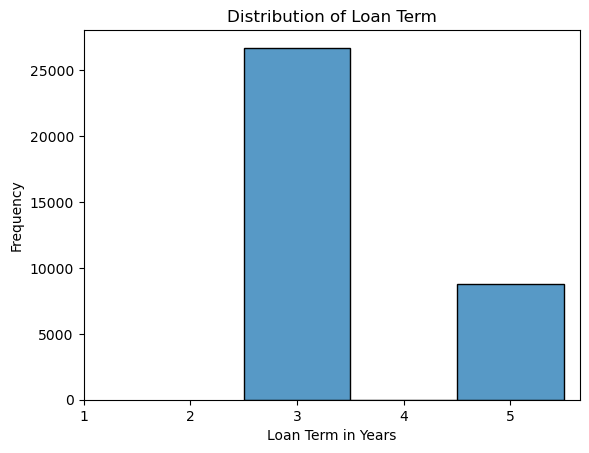

In [124]:
#Univariate Analysis Ordered 

sns.histplot(df_uni.term_y, bins=5, kde=False, discrete=True)
plt.xticks(ticks=[1,2,3,4,5])

# Set the title and labels
plt.title('Distribution of Loan Term')
plt.xlabel('Loan Term in Years')
plt.ylabel('Frequency')

plt.show()

#most of the loans issued for term 3 years

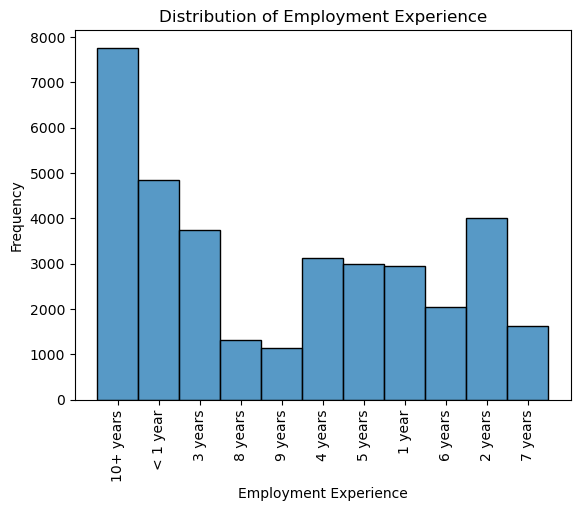

In [125]:
#Univariate Analysis Ordered 

sns.histplot(df_uni.emp_length, bins=11, kde=False, discrete=True)
plt.xticks(ticks=range(0,11))
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Distribution of Employment Experience')
plt.xlabel('Employment Experience')
plt.ylabel('Frequency')

plt.show()

#more loan application are having 10+ years experience and then followed by < 1 years experiences

#### 3.2. Univariate UnOrdered

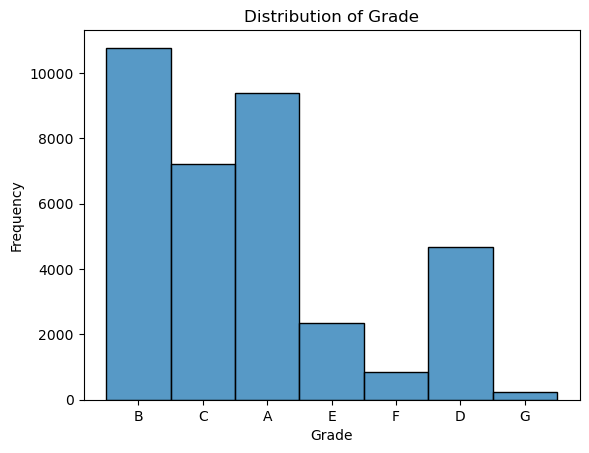

In [127]:
#Univariate Analysis UnOrdered 
# plt.figure(figsize=(10, 6))  # Optional: to set the figure size

sns.histplot(df_uni.grade,kde=False, discrete=True)

# Set the title and labels
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

#Grade B and followed by Grade A

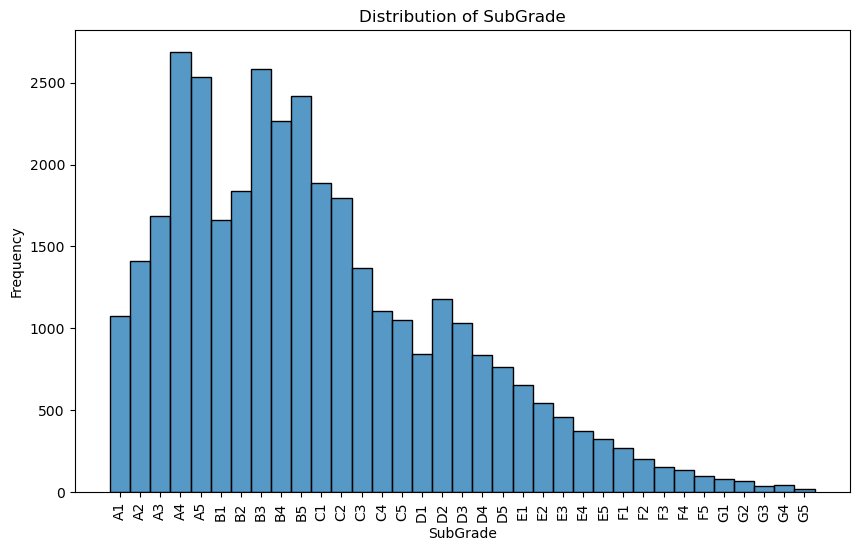

In [128]:
#Univariate Analysis UnOrdered 

plt.figure(figsize=(10, 6))  # Optional: to set the figure size
sns.histplot(df_uni.sort_values(by='sub_grade').sub_grade,kde=False, discrete=True)

# Set the title and labels
plt.title('Distribution of SubGrade')
plt.xlabel('SubGrade')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#A4, A5, followed by B3, B4, B5 are having high freqeuncy

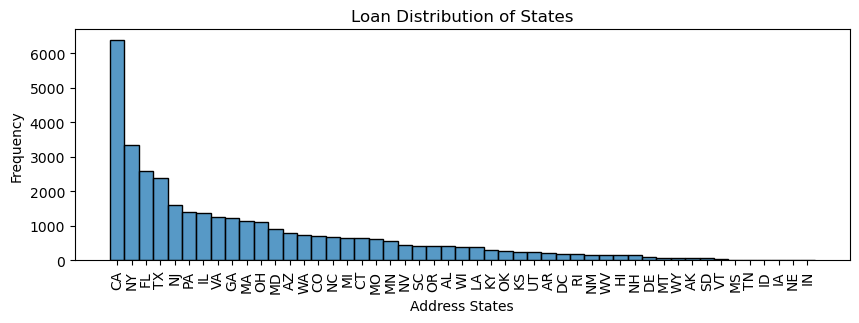

In [129]:
#Univariate Analysis UnOrdered 

plt.figure(figsize=(10, 3))

# Calculate the frequency of each state
state_counts = df_uni['addr_state'].value_counts().reset_index()
state_counts.columns = ['addr_state', 'frequency']

# Sort the states by frequency in descending order
state_counts = state_counts.sort_values(by='frequency', ascending=False)

# Create a categorical type for ordering the states in the histogram plot
df_uni['addr_state'] = pd.Categorical(df_uni['addr_state'], categories=state_counts['addr_state'], ordered=True)

sns.histplot(df_uni.sort_values(by='addr_state').addr_state, kde=False, discrete=True)
# Set the title and labels
plt.title('Loan Distribution of States')
plt.xlabel('Address States')
plt.ylabel('Frequency')
           
plt.xticks(rotation=90)
plt.show()

#CA has got more loan application 6000+ loan sanction, followed by NY

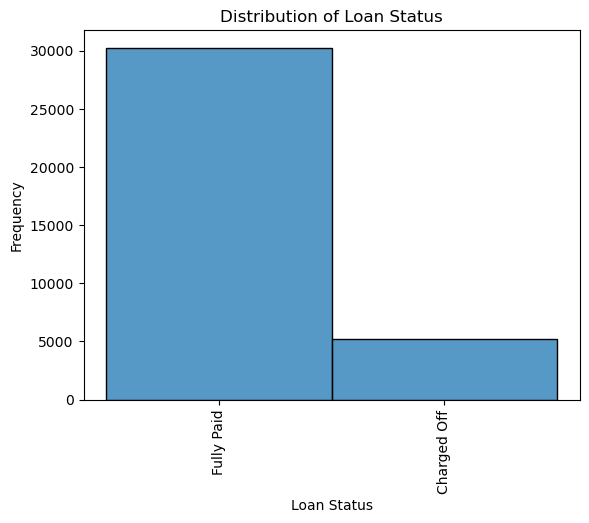

In [130]:
#Univariate Analysis UnOrdered 

sns.histplot(df_uni.loan_status, kde=False, discrete=True)

# Set the title and labels
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

# most of the loan have fully paid
# but there is significant amount of loan for defaulted (~15%)

In [131]:
#mostly fully paid, but around 5000 have been defaulted
df_uni[df_uni["loan_status"] == "Charged Off"].shape[0]/df_uni.shape[0]*100
# but there is significant amount of loan for defaulted (~15%)

14.782265787842938

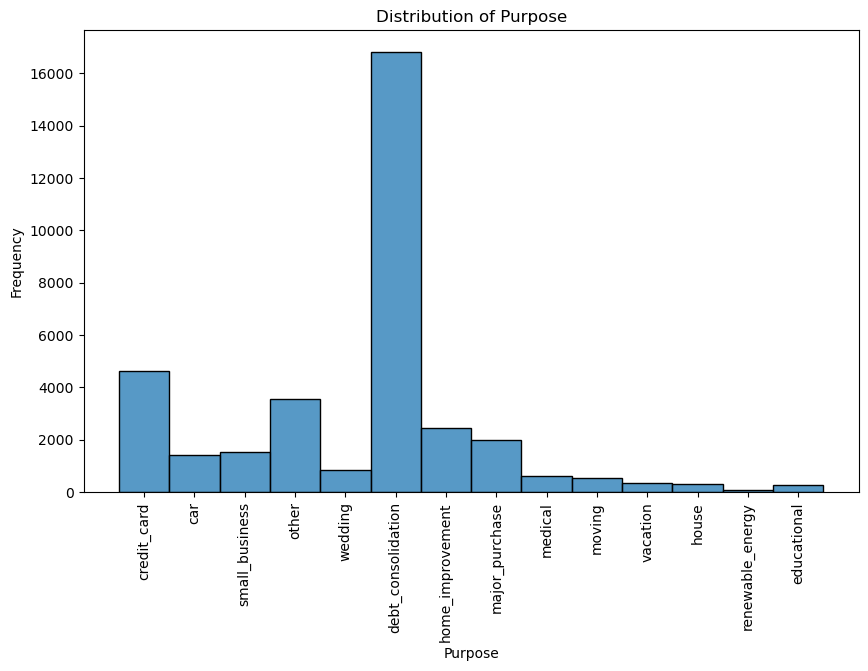

In [132]:
#Univariate Analysis UnOrdered 

plt.figure(figsize=(10, 6))  # Optional: to set the figure size
sns.histplot(df_uni.purpose, kde=False, discrete=True)

# Set the title and labels
plt.title('Distribution of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

#debt_consolidation purpose got more than 16000+ - which is very high

In [133]:
df_uni.loan_amnt.describe()

count    35502.000000
mean     10618.053208
std       7006.432135
min        500.000000
25%       5000.000000
50%       9000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [134]:
#get the debt_consolidation loan amount avg
df_uni[df_uni.purpose == "debt_consolidation"].loan_amnt.describe()
#avg loan amount for debt_consolidation is about ~12000 which is significantly higher than the average loan_amount

count    16803.000000
mean     12131.751771
std       7101.630724
min        700.000000
25%       6625.000000
50%      10500.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

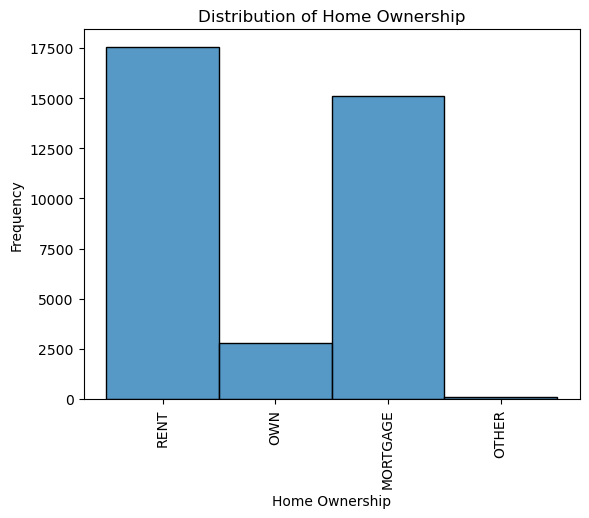

In [135]:
#Univariate Analysis UnOrdered 

# plt.figure(figsize=(10, 6))  # Optional: to set the figure size
sns.histplot(df_uni.home_ownership, kde=False, discrete=True)
# Set the title and labels
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

#mostly home ownership of rent and closely followed by mortgage

#### 3.2.1 Univariate UnOrdered Quantitative

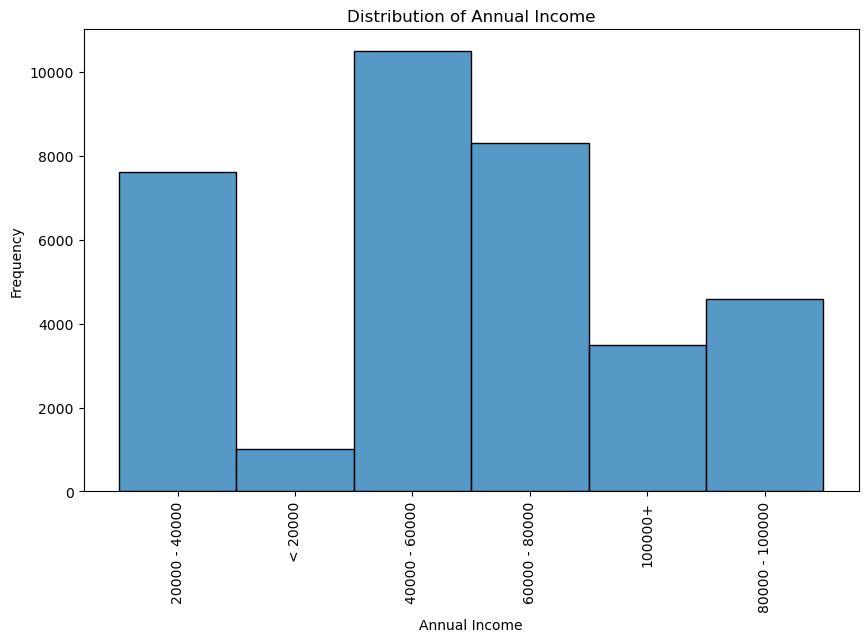

In [137]:
#Univariate Analysis UnOrdered 
#Quantitative variables

plt.figure(figsize=(10, 6))  # Optional: to set the figure size
sns.histplot(df_uni.annual_inc_category, kde=False)
# Set the title and labels
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

#most of them are 40000 to 60000 annual income category, followed by 60000-80000

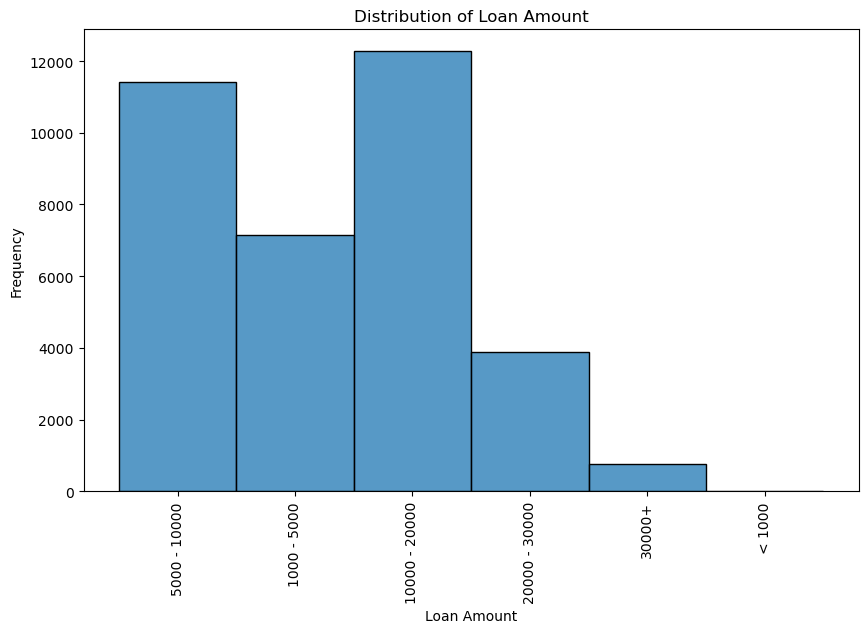

In [138]:
#Univariate Analysis UnOrdered 
#Quantitative variables

plt.figure(figsize=(10, 6))  # Optional: to set the figure size
sns.histplot(df_uni.loan_amnt_category, kde=False)

# Set the title and labels
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

#10000 - 20000  applied loan amount is higher and closely followed by 5000-10000

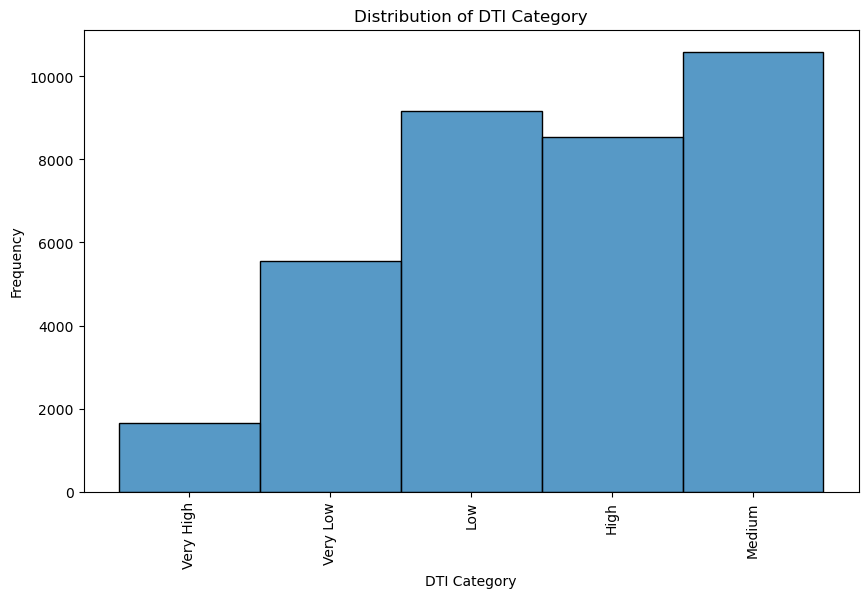

In [139]:
#Univariate Analysis UnOrdered 
#Quantitative variables

plt.figure(figsize=(10, 6))  # Optional: to set the figure size
sns.histplot(df_uni.dti_category, kde=False)
# Set the title and labels
plt.title('Distribution of DTI Category')
plt.xlabel('DTI Category')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

#dti category medium is more closely followed by low
#dti very low has potentional for better loan approval

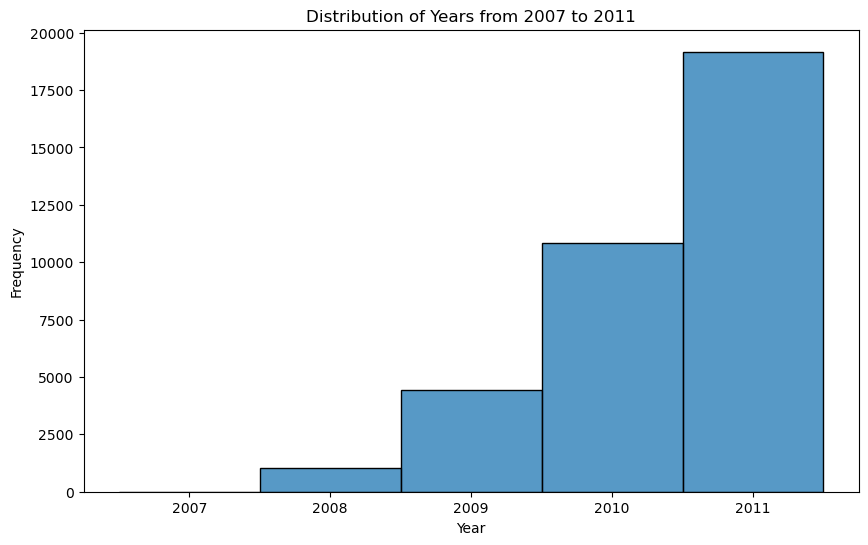

In [140]:
#Univariate Analysis UnOrdered 
#Quantitative variables

plt.figure(figsize=(10, 6))  # Optional: to set the figure size
sns.histplot(df_uni.issue_d_y, bins=5, kde=False, discrete=True)

# Set the title and labels
plt.title('Distribution of Years from 2007 to 2011')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(range(2007, 2012))
plt.show()

#loan issued increased over years, almost more than doubled every year

#### 4. Segmented Univariate Analysis

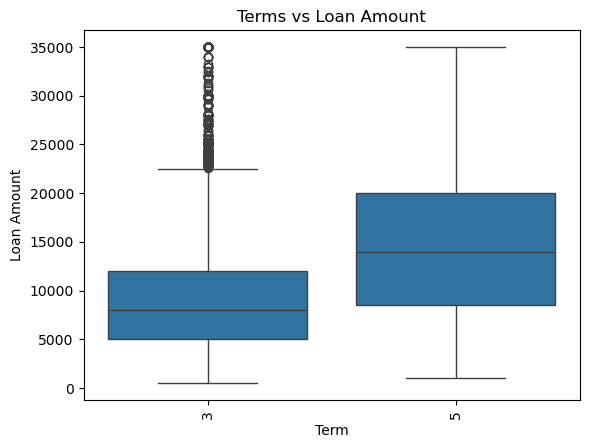

In [142]:
#Segmented Univariate Analysis
sns.boxplot(x='term_y', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Terms vs Loan Amount')
plt.xlabel('Term')
plt.ylabel('Loan Amount')

plt.show()

#loan amount for 3 years 7500 (5000-12000), for 5 years its 15000 (8000-20000)
#Term of 5 years got higher loan amount
#more outliers on 3 years term

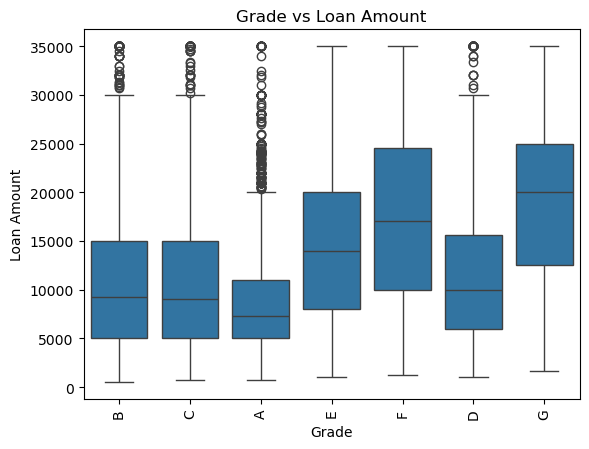

In [143]:
sns.boxplot(x='grade', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Grade vs Loan Amount')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

#Grade A, B, C, D medians are almost same with loan amount (10000)
#Grade F and G medians are high (20000)
#Grade E is median (15000)

#more outliers on grade A followed by B and C

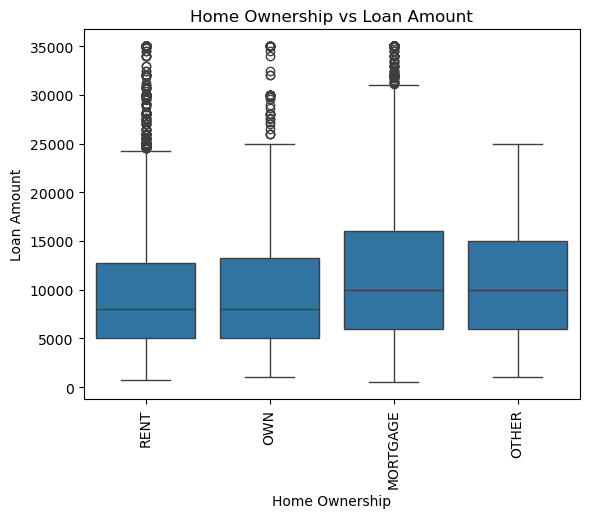

In [144]:
sns.boxplot(x='home_ownership', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Home Ownership vs Loan Amount')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

#median of home ownership is almost same across different segments
#home ownership with mortgage got higher loan amount
#more outliers for RENt and mortgage home owners

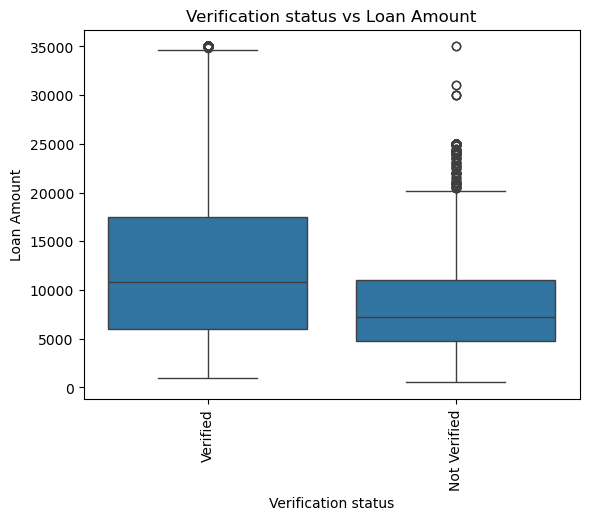

In [145]:
sns.boxplot(x='verification_status', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Verification status vs Loan Amount')
plt.xlabel('Verification status')
plt.ylabel('Loan Amount')
plt.show()
#verified have having less outliers and median is 11000
#not verified having more outliers and median is 7000

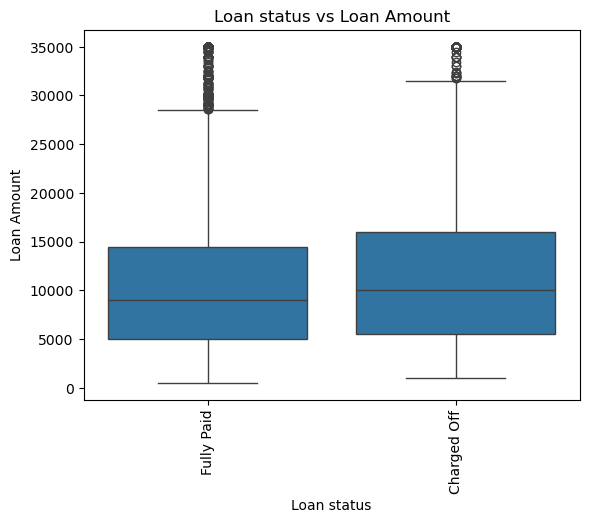

In [146]:
sns.boxplot(x='loan_status', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Loan status vs Loan Amount')
plt.xlabel('Loan status')
plt.ylabel('Loan Amount')
plt.show()
#fully paid having more outliers
#both fully paid and charged off having median of 10000
#Charged Off loans have higher amounts than Fully Paid ones.
#fully paid has more outliers

Text(0, 0.5, 'Loan Amount')

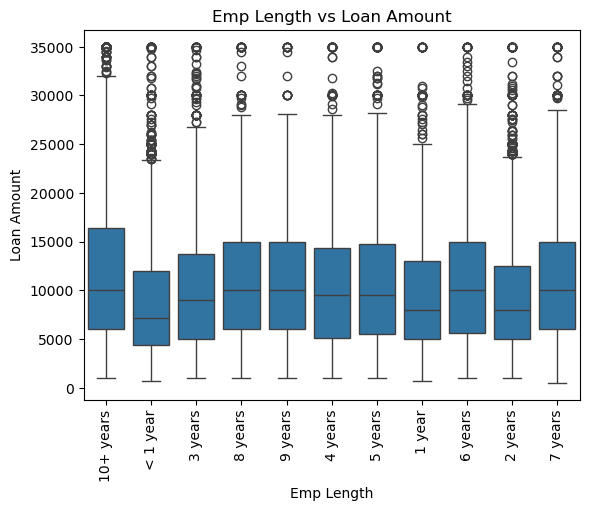

In [147]:
sns.boxplot(x='emp_length', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Emp Length vs Loan Amount')
plt.xlabel('Emp Length')
plt.ylabel('Loan Amount')

#10+ have higher loan amount
#meidans are similar from 5+ years
#<1 year, 1 and 2 years have upper bound as ~12000

Text(0, 0.5, 'Loan Amount')

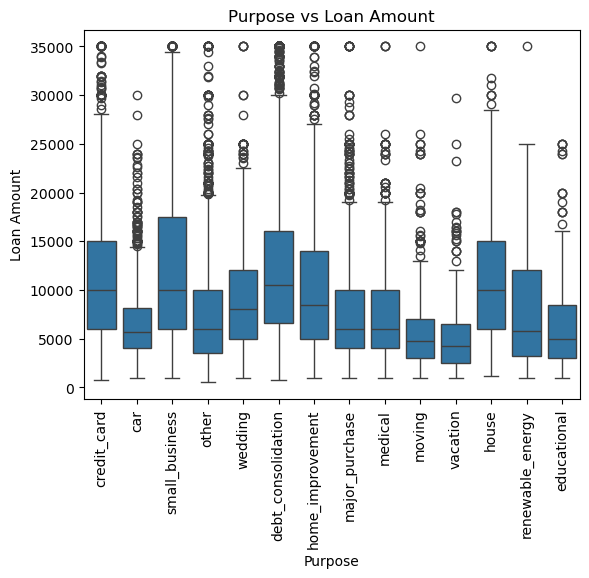

In [148]:
sns.boxplot(x='purpose', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan Amount')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')

# small_business have higher upper bound of loan amount (18000)
# house, debt_consolidation and credit_card have almost similar ranges (median is 10000)
# vacation, moving, car have similar upper/lower bound and medians for loan amount

Text(0, 0.5, 'Loan Amount')

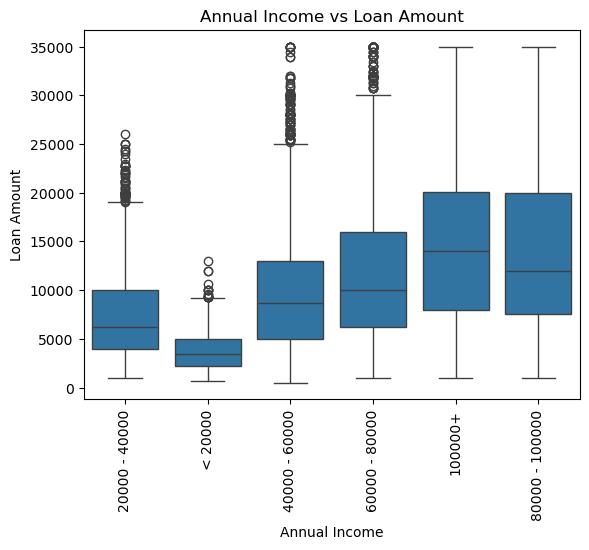

In [149]:
sns.boxplot(x='annual_inc_category', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')

#annual income > 80000, 100000+ have higher loan amount
#annual income < 20000 have lower loan amount

Text(0, 0.5, 'Loan Amount')

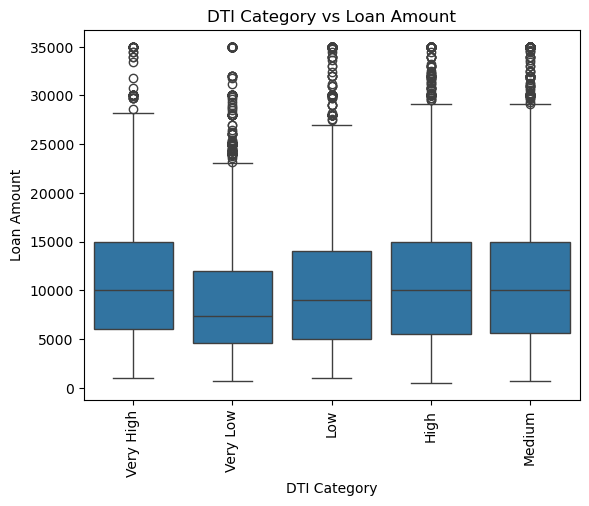

In [150]:
sns.boxplot(x='dti_category', y=df_uni.loan_amnt, data=df_uni)
plt.xticks(rotation=90)
plt.title('DTI Category vs Loan Amount')

plt.xlabel('DTI Category')
plt.ylabel('Loan Amount')

#DTI is high for higher loan amount (upper bound: 150000)
#DTI is very low for lower loan amount (upper bound: 12000)

Text(0, 0.5, 'Interest Rate')

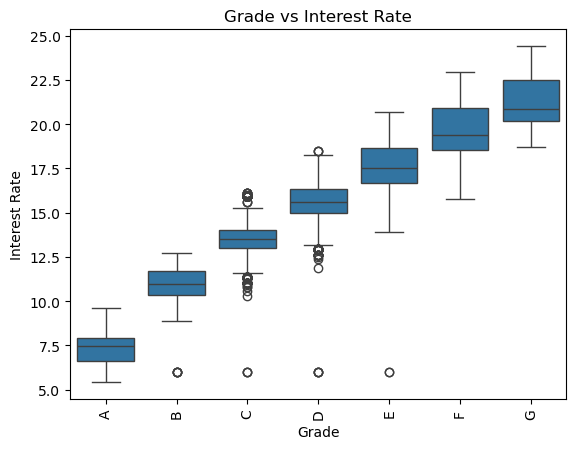

In [151]:

plt.xticks(rotation=90)
plt.title('Grade vs Interest Rate')

# Extract unique grades and sort them
grade_order = sorted(df_uni['grade'].unique())

sns.boxplot(x='grade', y=df_uni.int_rate, data=df_uni, order=grade_order)

plt.xlabel('Grade')
plt.ylabel('Interest Rate')

#Interest rate are higher for grades which are lowering

Text(0, 0.5, 'Interest Rate')

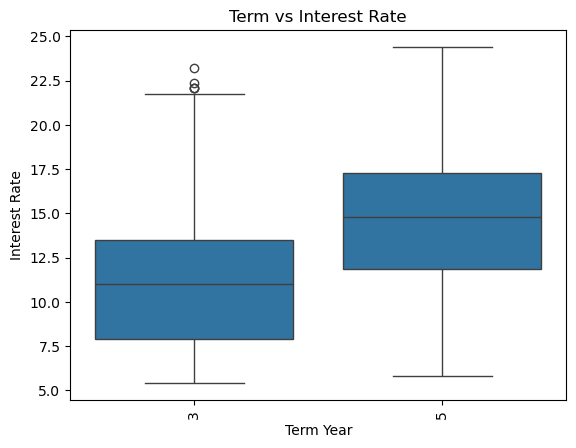

In [152]:
plt.xticks(rotation=90)
plt.title('Term vs Interest Rate')

sns.boxplot(x='term_y', y=df_uni.int_rate, data=df_uni)

plt.xlabel('Term Year')
plt.ylabel('Interest Rate')

#Interest rate are higher for higher tenure

Text(0, 0.5, 'Interest Rate')

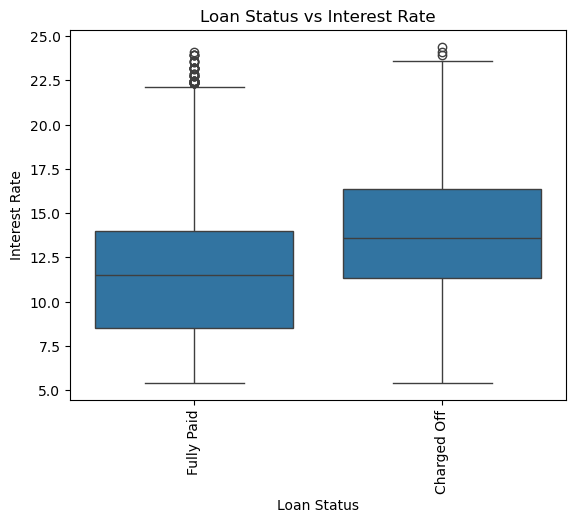

In [153]:
plt.xticks(rotation=90)
plt.title('Loan Status vs Interest Rate')

sns.boxplot(x='loan_status', y=df_uni.int_rate, data=df_uni)

plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')

#Higher interest loan are charged off leading to defaulting the loan

Text(0, 0.5, 'Proportion')

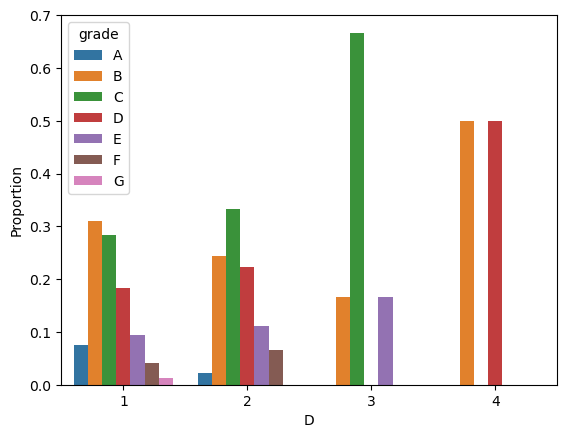

In [154]:
df_plt = df_uni[(df_uni["pub_rec"] > 0)]
df_plt = df_plt.groupby(['pub_rec', 'grade'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
# Calculate the proportion within each group of 'pub_rec'
df_plt['proportion'] = df_plt.groupby('pub_rec')['count'].transform(lambda x: x / x.sum())

sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df_plt)

plt.xlabel('D')
plt.ylabel('Proportion')

#We can see the grades are really showing some pattern. 
# B,C,D,E graded people are having high pub_recs.
# A is low on pub_rec
# G grade people very low pub records. possibiliy not many loans approved in first place

Text(0, 0.5, 'Proportion')

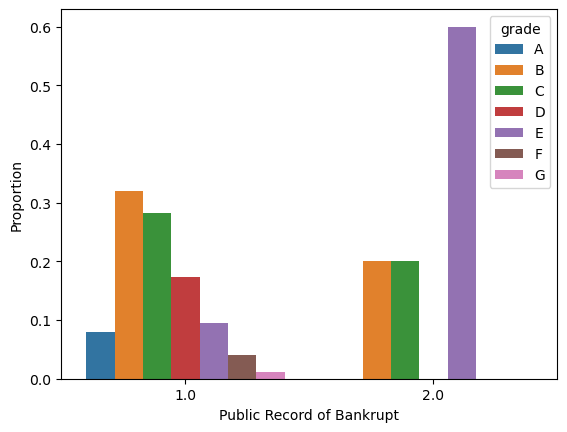

In [155]:
df_plt = df_uni[(df_uni["pub_rec_bankruptcies"] > 0)]
df_plt = df_plt.groupby(['pub_rec_bankruptcies', 'grade'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
# Calculate the proportion within each group of 'pub_rec_bankruptcies'
df_plt['proportion'] = df_plt.groupby('pub_rec_bankruptcies')['count'].transform(lambda x: x / x.sum())

sns.barplot(x='pub_rec_bankruptcies', y='proportion', hue='grade', data=df_plt)
plt.xlabel('Public Record of Bankrupt')
plt.ylabel('Proportion')
#Category E, B, C are having high pub_rec_bankruptcies ~2.
#Category G is less,  possibiliy not many loans approved in first place

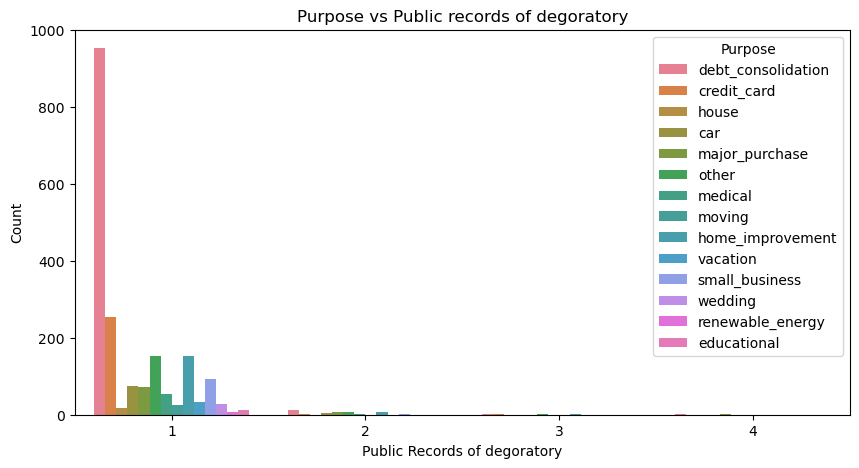

In [156]:
plt.figure(figsize=(10,5))
df_plt = df_uni[(df_uni["pub_rec"] > 0)]
sns.countplot(x='pub_rec', hue='purpose', data=df_plt)
plt.title('Purpose vs Public records of degoratory')
plt.xlabel('Public Records of degoratory')
plt.ylabel('Count')
plt.legend(title='Purpose')
plt.show()

#debt_consolidation loan having higher pub records for degoratory, followed by credit_card

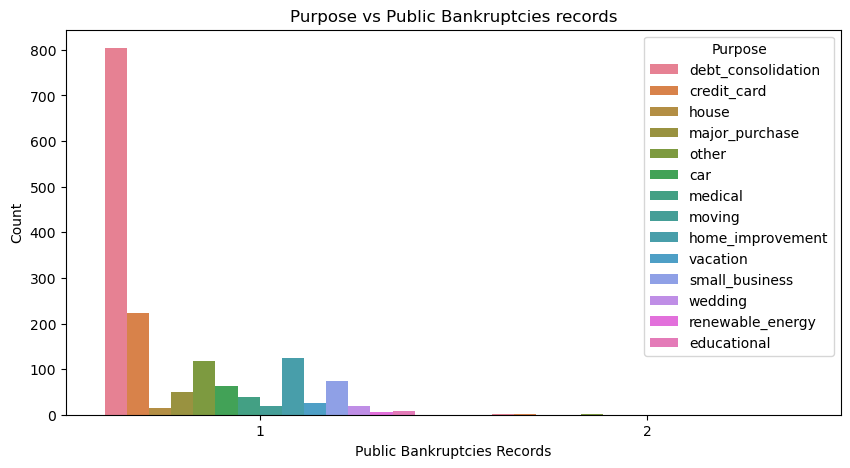

In [157]:
plt.figure(figsize=(10,5))
df_plt = df_uni[(df_uni["pub_rec_bankruptcies"] > 0)]
sns.countplot(x='pub_rec', hue='purpose', data=df_plt)
plt.title('Purpose vs Public Bankruptcies records')
plt.xlabel('Public Bankruptcies Records')
plt.ylabel('Count')
plt.legend(title='Purpose')
plt.show()

#debt_consolidation loan having higher pub records for bankrup, followed by credit_card

#### 5. Bivariate Analysis

#### 5.1 Bivariate Analysis Ordered

In [160]:
df_bi = df_uni.copy()

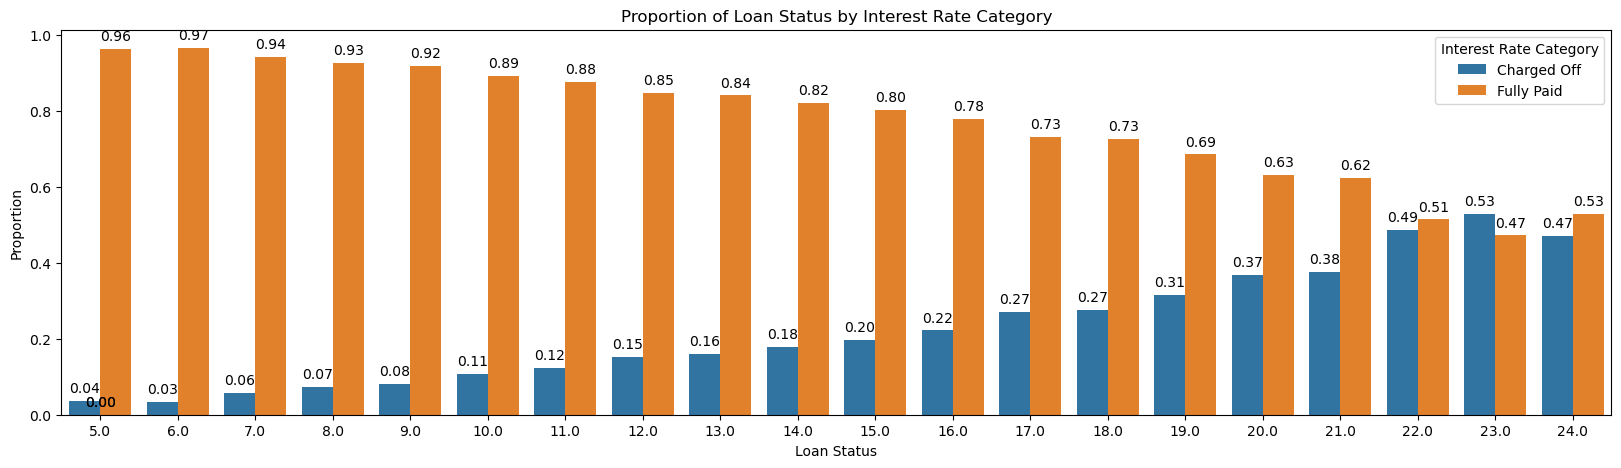

In [161]:
#ordered bivariate
plt.figure(figsize=(20,5))
df_plt = df_bi.groupby(['int_rate_category', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('int_rate_category')['count'].transform(lambda x: x / x.sum())

barplot = sns.barplot(x='int_rate_category', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')


# Set the title and labels
plt.title('Proportion of Loan Status by Interest Rate Category')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Interest Rate Category')

# Show the plot
plt.show()

#higher the interest rate charged off is more
#22 to 25 interest rate have more charged off
#22 to 25 interest rate have very low paid fully loan

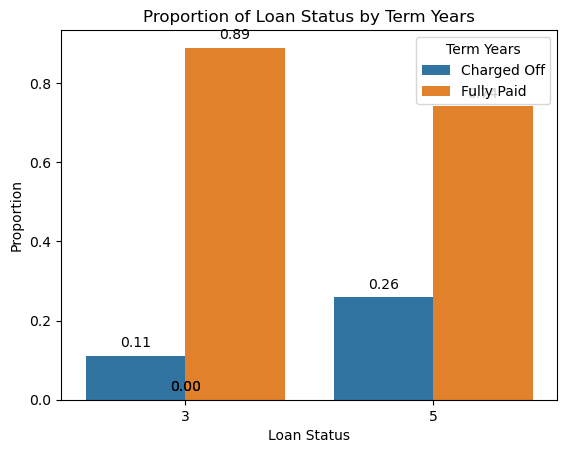

In [162]:
#ordered bivariate 
df_plt = df_bi.groupby(['term_y', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('term_y')['count'].transform(lambda x: x / x.sum())
# print(df_plt)
barplot = sns.barplot(x='term_y', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Set the title and labels
plt.title('Proportion of Loan Status by Term Years')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Term Years')

# Show the plot
plt.show()

#5 years of loan have defaulted more, compare to short term 3 years

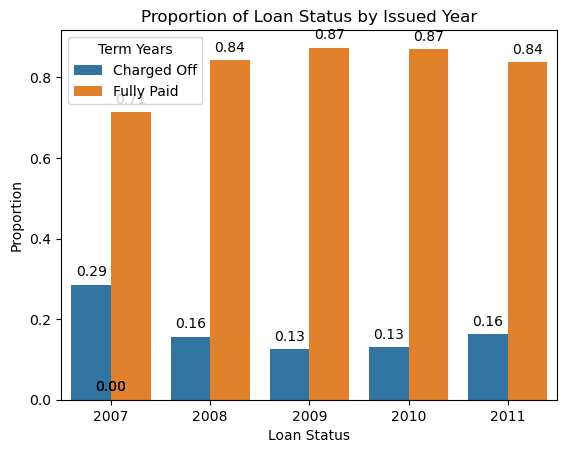

In [163]:
#ordered bivariate 
df_plt = df_bi.groupby(['issue_d_y', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('issue_d_y')['count'].transform(lambda x: x / x.sum())
# print(df_plt)
barplot = sns.barplot(x='issue_d_y', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Set the title and labels
plt.title('Proportion of Loan Status by Issued Year')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Term Years')

# Show the plot
plt.show()

#the defaulted loan amount reduced from 2007 but on 2011 it got increased back to 0.16

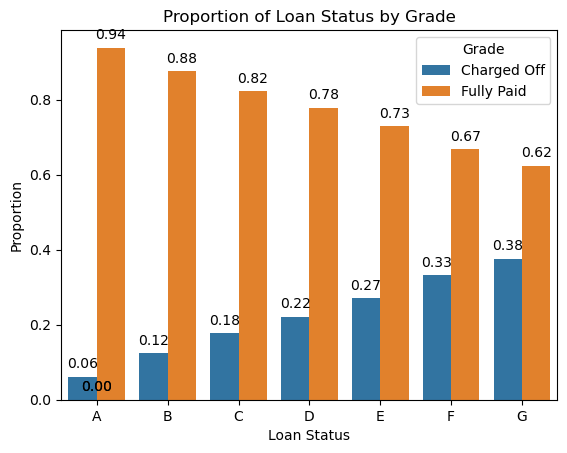

In [164]:
# bivariate Analysis of Ordered Categorical Variables
df_plt = df_bi.groupby(['grade', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('grade')['count'].transform(lambda x: x / x.sum())

barplot = sns.barplot(x='grade', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')


# Set the title and labels
plt.title('Proportion of Loan Status by Grade')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Grade')

# Show the plot
plt.show()

#While the grades increased the A to G the loan got defaulted

#### 5.2. Bivariate UnOrdered

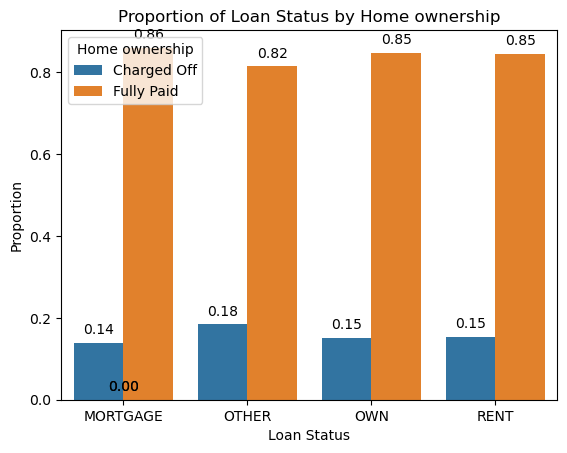

In [166]:
#unordered bivariate
df_plt = df_bi.groupby(['home_ownership', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('home_ownership')['count'].transform(lambda x: x / x.sum())

barplot = sns.barplot(x='home_ownership', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')


# Set the title and labels
plt.title('Proportion of Loan Status by Home ownership')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Home ownership')

# Show the plot
plt.show()

#loan with home_ownership having OTHER have defaulted more
#other than "OTHER" every other category equal in chareged off

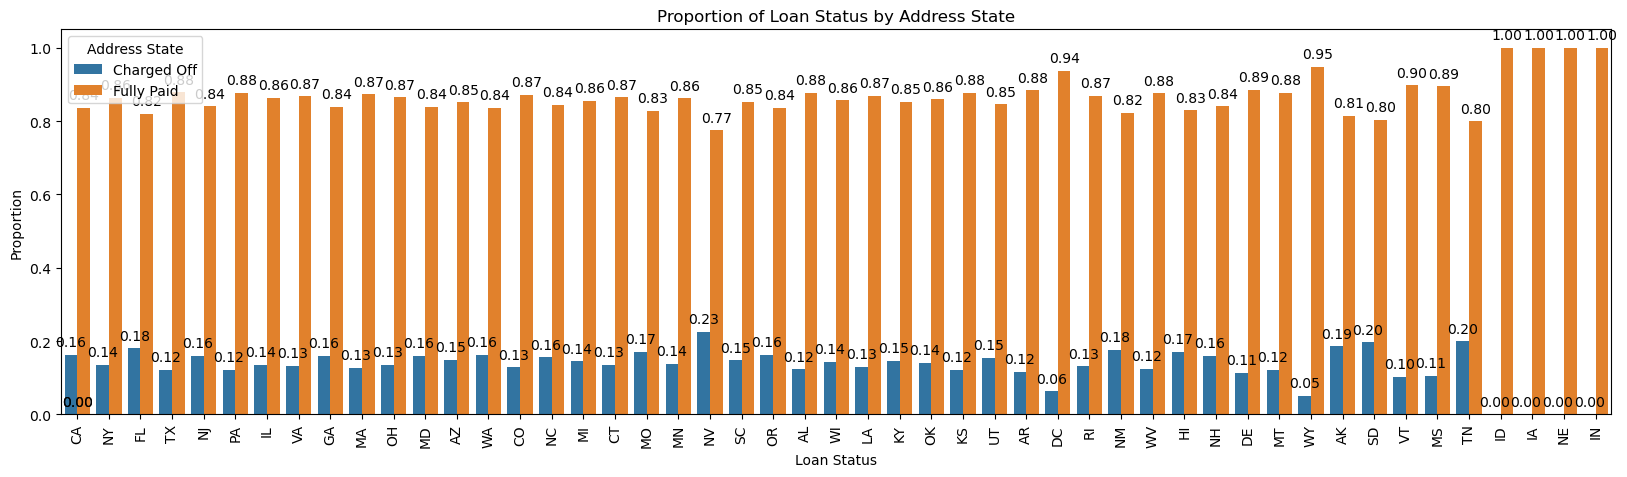

In [167]:
#unordered bivariate
plt.figure(figsize=(20,5))
df_plt = df_bi.groupby(['addr_state', 'loan_status'], as_index=False)["loan_amnt"].count()

df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('addr_state')['count'].transform(lambda x: x / x.sum())

barplot = sns.barplot(x='addr_state', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Set the title and labels
plt.title('Proportion of Loan Status by Address State')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Address State')
plt.xticks(rotation=90)
# Show the plot
plt.show()

#State NE have more charged and less paid fully 
#State IA

#IA, IN, NE, ID - High paid off, no defaults (very low loan has been provided) #already shorted by frequency of loan amount
#WY, DC, - High paid off
#CA is 0.16, 0.14 (more loan provided to these states)

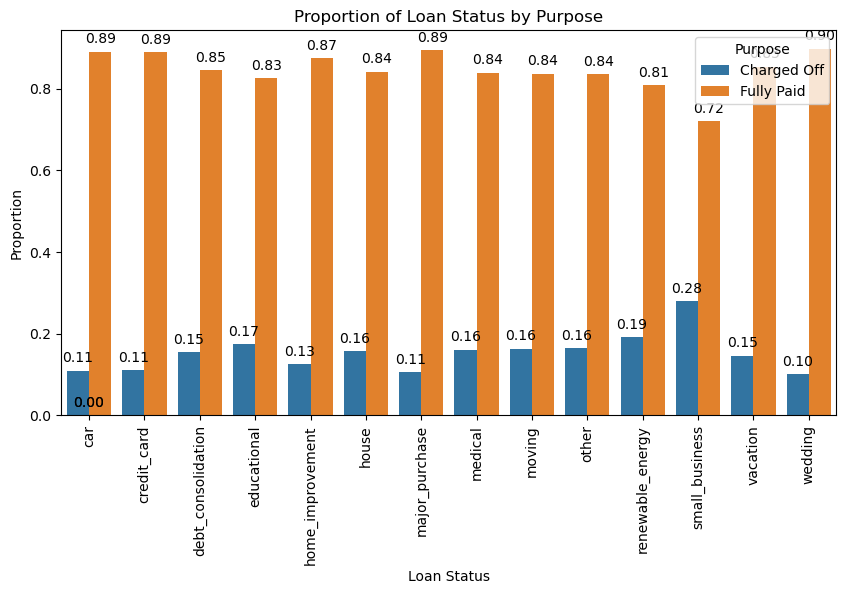

In [168]:
#unordered bivariate

plt.figure(figsize=(10,5))
df_plt = df_bi.groupby(['purpose', 'loan_status'], as_index=False)["loan_amnt"].count()

df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('purpose')['count'].transform(lambda x: x / x.sum())

barplot = sns.barplot(x='purpose', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Set the title and labels
plt.title('Proportion of Loan Status by Purpose')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Purpose')
plt.xticks(rotation=90)
# Show the plot
plt.show()

#Small business defaulted more (0.28)
#renewable_energy defaulted more (0.19)
#educational and debt_consolidation (0.16/0.17)

#wedding have defaulted very less
#car, credit_card, major_purchage have low defaulted loan

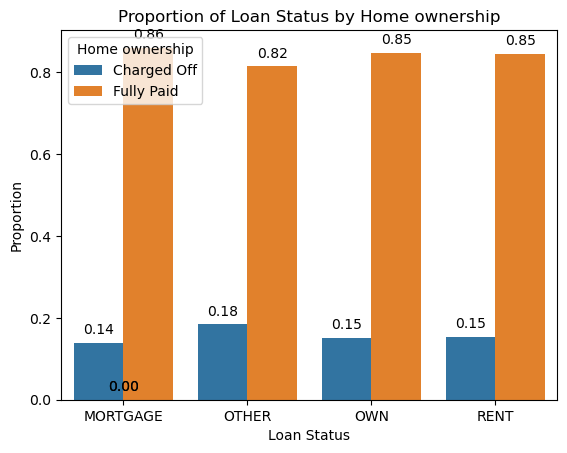

In [169]:
df_plt = df_bi.groupby(['home_ownership', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('home_ownership')['count'].transform(lambda x: x/x.sum())
#df_plt['proportion'] = df_plt.groupby('home_ownership')['count'].transform(lambda x: x)
barplot = sns.barplot(x='home_ownership', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')


# Set the title and labels
plt.title('Proportion of Loan Status by Home ownership')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Home ownership')

# Show the plot
plt.show()

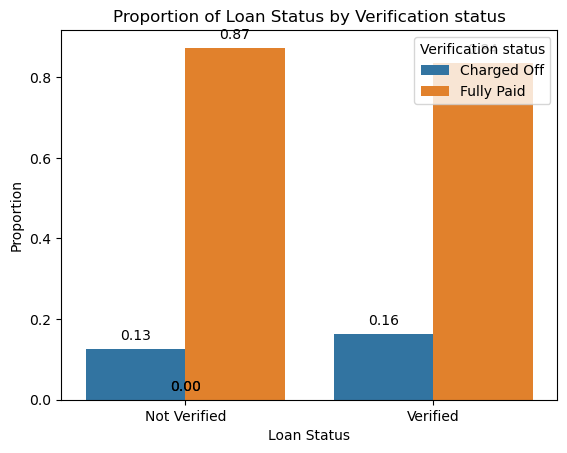

In [170]:
#unordered bivariate
df_plt = df_uni.groupby(['verification_status', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('verification_status')['count'].transform(lambda x: x/x.sum())
#df_plt['proportion'] = df_plt.groupby('home_ownership')['count'].transform(lambda x: x)
barplot = sns.barplot(x='verification_status', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')


# Set the title and labels
plt.title('Proportion of Loan Status by Verification status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Verification status')

# Show the plot
plt.show()

#verificed status have marjionally higher in defaulted loan

#### 5.3. Bivariate Ordered Quantitative

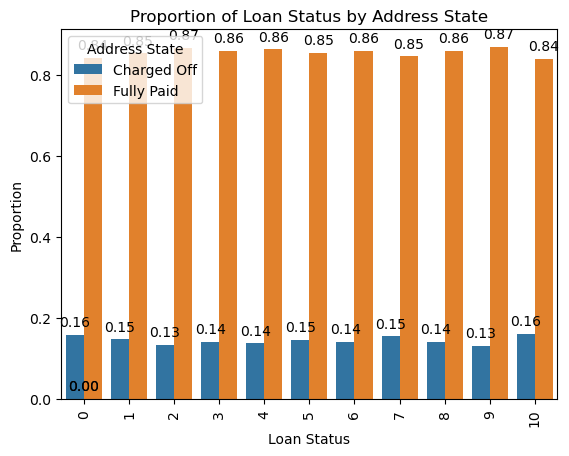

In [172]:
#unordered bivariate quantitative
df_plt = df_bi.groupby(['emp_exp', 'loan_status'], as_index=False)["loan_amnt"].count()

df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('emp_exp')['count'].transform(lambda x: x / x.sum())

barplot = sns.barplot(x='emp_exp', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Set the title and labels
plt.title('Proportion of Loan Status by Address State')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Address State')
plt.xticks(rotation=90)
# Show the plot
plt.show()

#All experience are equaly paid fully and defaulted equally
#no major deviations
#2 years and 9 years are minor deviations with low default

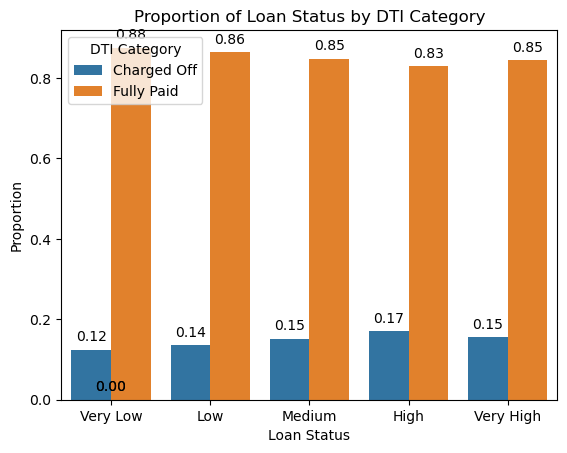

In [173]:
#ordered bivariate quantitative
df_plt = df_bi.groupby(['dti_category', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('dti_category')['count'].transform(lambda x: x / x.sum())


dti_order = [ "Very Low", "Low", "Medium", "High", "Very High" ]
barplot = sns.barplot(x='dti_category', y='proportion', hue='loan_status', data=df_plt, order=dti_order)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Set the title and labels
plt.title('Proportion of Loan Status by DTI Category')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='DTI Category')

# Show the plot
plt.show()


#DTI Caterogy of very low defaulted less
#Based on DTI category are growing along defaulted but very high DTI is equal to medium

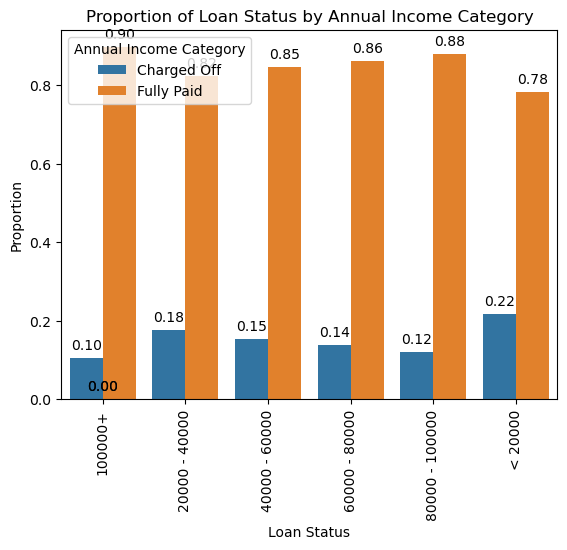

In [174]:
#ordered bivariate quantitative
df_plt = df_bi.groupby(['annual_inc_category', 'loan_status'], as_index=False)["loan_amnt"].count()
df_plt.rename(columns={'loan_amnt': 'count'}, inplace=True)
df_plt['proportion'] = df_plt.groupby('annual_inc_category')['count'].transform(lambda x: x / x.sum())
# print(df_plt)
barplot = sns.barplot(x='annual_inc_category', y='proportion', hue='loan_status', data=df_plt)

# Annotate the bars with the proportion values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Set the title and labels
plt.title('Proportion of Loan Status by Annual Income Category')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.legend(title='Annual Income Category')
plt.xticks(rotation=90)
# Show the plot
plt.show()

#Salary range lesser than 20000 have defaulted more loan, followed by Salary range 20000-40000 defaulted more loans
#Salary range of 80000+ and 1000000+ paid fully more and less charged off

Text(0, 0.5, 'Interest Rate')

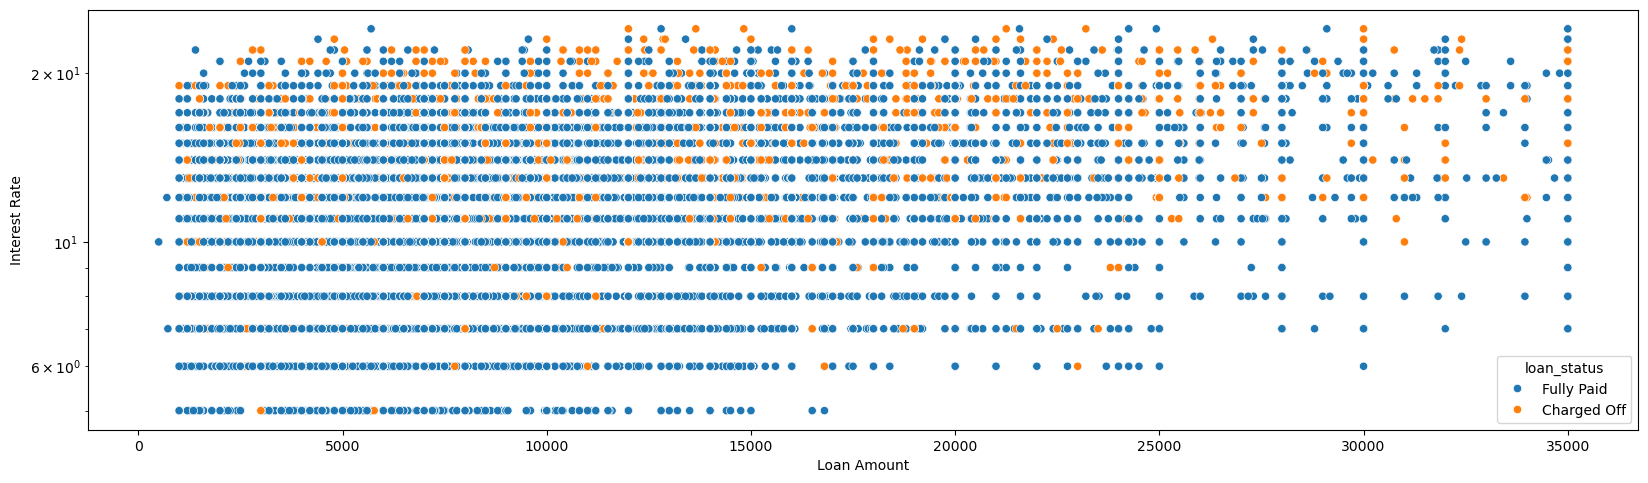

In [175]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='int_rate_category', data=df_uni, hue='loan_status')
plt.yscale('log')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
#interest more than 10% having defauled more
#interest rage more than 20% defaulted much more than fully paid
#there is less loans for lesser interet rate for loan amount > 15000+

#### 6. Correlation Analysis

In [177]:
## Correlation Analysis
df_corr = df_bi.copy()

In [178]:
#select column field which are only numerical
df_corr = df_corr[df_corr.select_dtypes(include=['number']).columns]

In [179]:
df_corr.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'emp_exp', 'last_pymnt_d_m',
       'last_pymnt_d_y', 'last_pymnt_d_q', 'last_credit_pull_d_m',
       'last_credit_pull_d_y', 'last_credit_pull_d_q', 'issue_d_m',
       'issue_d_y', 'issue_d_q', 'int_rate_category', 'term_y'],
      dtype='object')

In [180]:
# remove unwanted columns
df_corr.drop(['delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util',  'int_rate_category', 'term_y',
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'issue_d_q', 'int_rate', 'last_pymnt_d_m', 'last_pymnt_d_y', 
        'last_pymnt_d_q', 'last_credit_pull_d_m',
       'last_credit_pull_d_y', 'last_credit_pull_d_q', 'issue_d_m',
       'issue_d_y' ], axis=1, inplace=True)

In [181]:
corr = df_corr.corr()

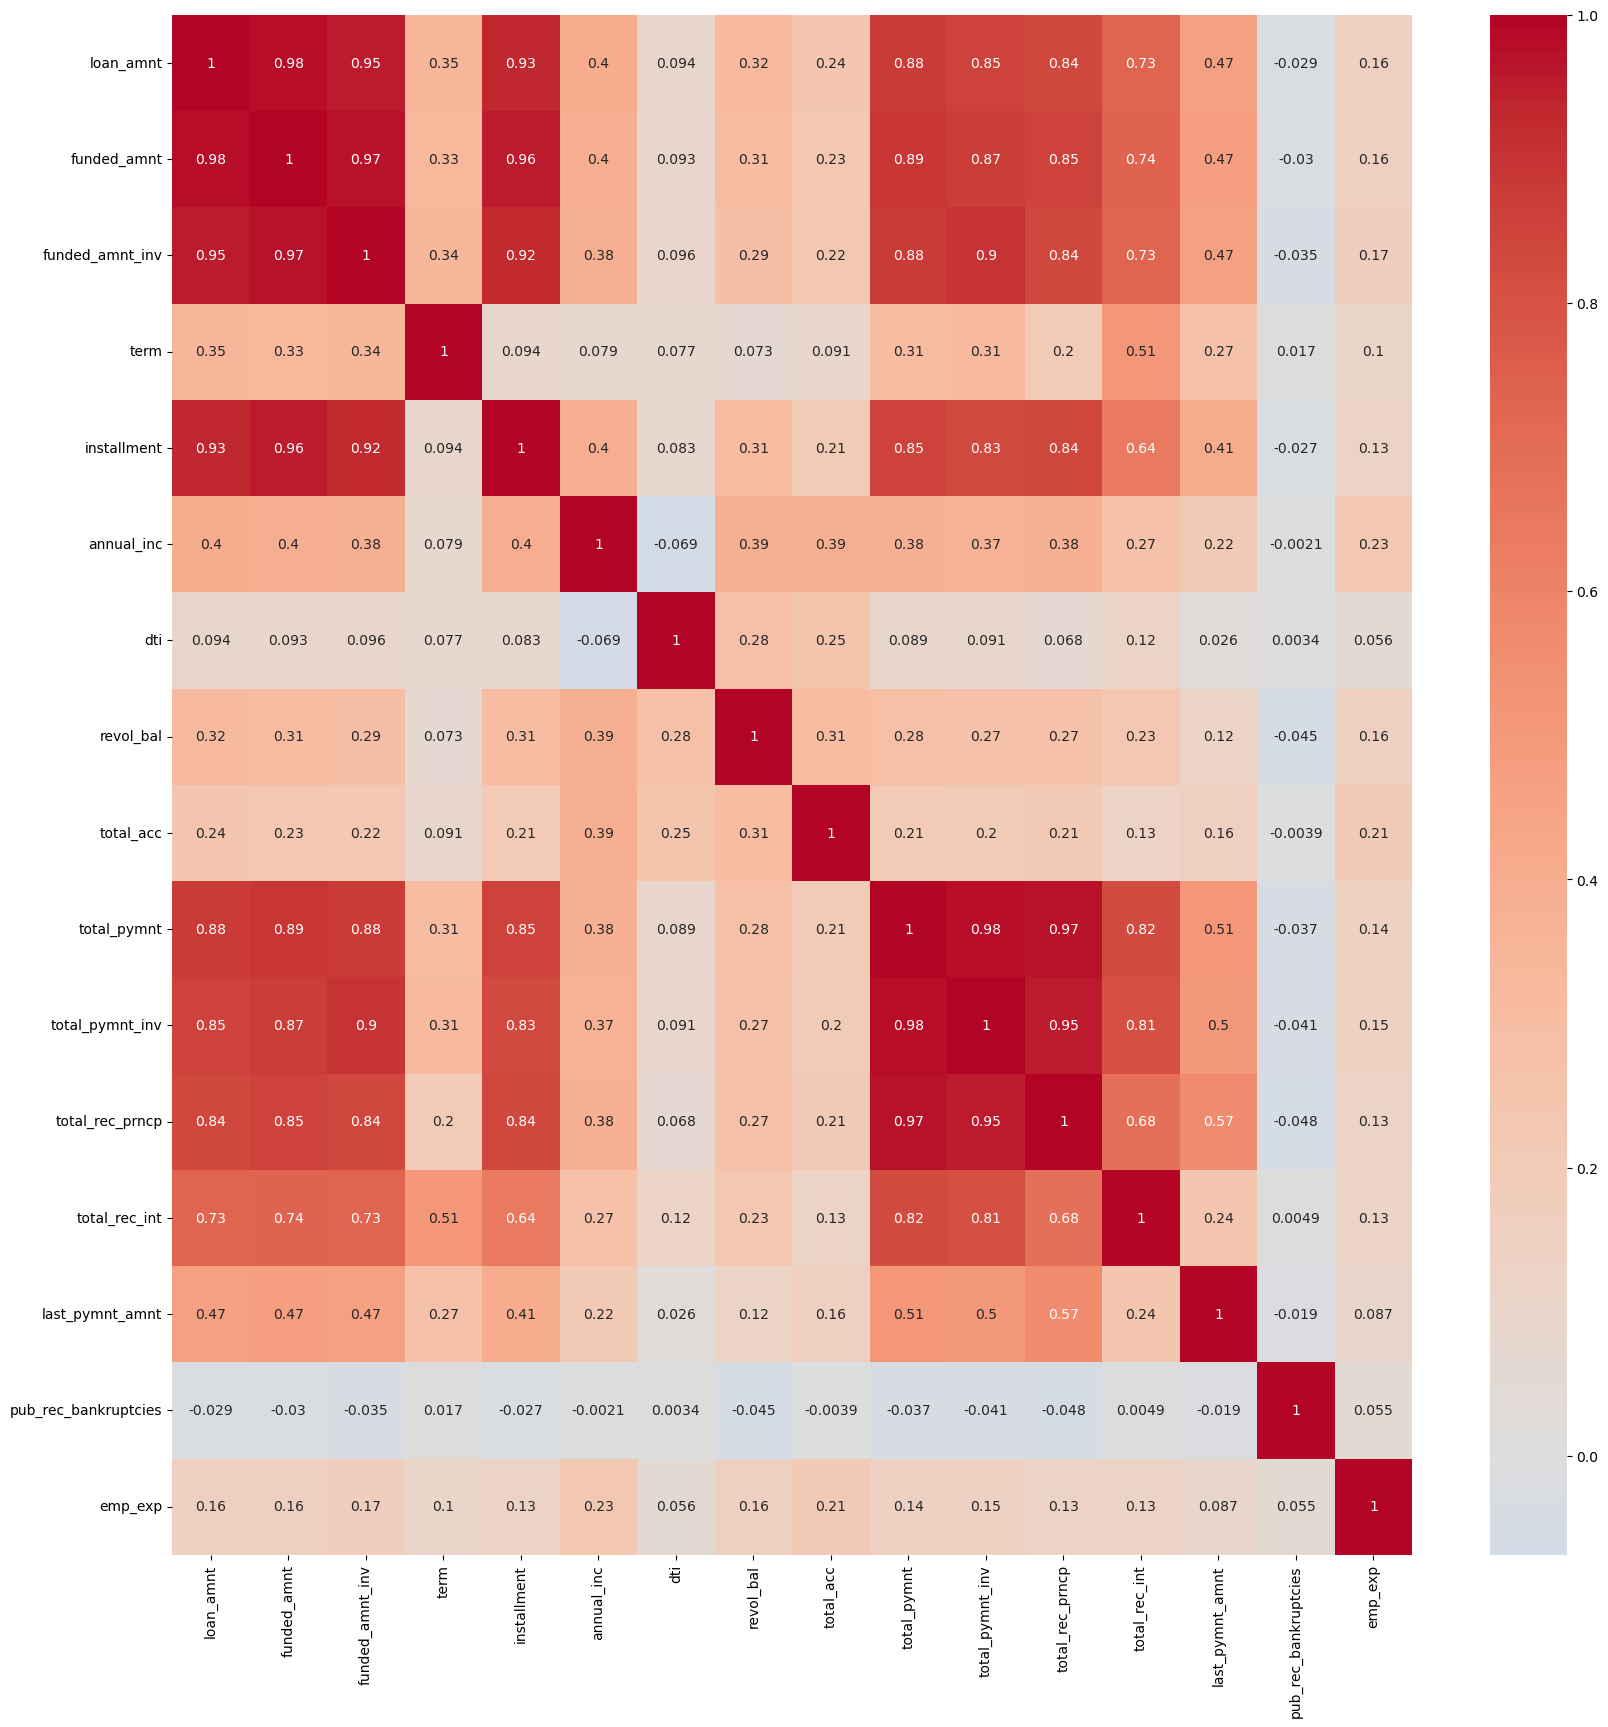

In [182]:
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

plt.savefig('corr.png')
plt.show()
#loan_amount, funded_amt, fundedn_amt_inv have very high correation
#installment have high correlation with loan_amount, funded_amt, fundedn_amt_inv
#total_payment have high correlation with loan_amount, funded_amt, fundedn_amt_inv, installment, 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
#last_payment_amt have moderate correlation with loan_amount, funded_amt, fundedn_amt_inv, installment, 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',

# revol_bal have a low correlation with loan_amount, funded_amt, fundedn_amt_inv
#Total credit revolving balance


# 0.9 to 1.0 (or -0.9 to -1.0): Very high correlation
# 0.7 to 0.9 (or -0.7 to -0.9): High correlation
# 0.5 to 0.7 (or -0.5 to -0.7): Moderate correlation
# 0.3 to 0.5 (or -0.3 to -0.5): Low correlation
# 0 to 0.3 (or -0.3 to 0): Very low or no correlation

### 7. Recommendations

#### Discussed in Presentation